Modulo A

1.

2. Data loading and visualization
    

        2.1 Create a dictionary with the different classes of the problem

In [1]:
import os
# Define the classes
classes = ['forward', 'backward', 'left', 'right', 'stop', '_silence_', '_unknown_']

# Create the dictionary
class_files = {class_name: os.listdir(f'./dataset/{class_name}') for class_name in classes}

print(class_files)

{'forward': ['012187a4_nohash_0.wav', '017c4098_nohash_0.wav', '017c4098_nohash_1.wav', '017c4098_nohash_2.wav', '017c4098_nohash_3.wav', '017c4098_nohash_4.wav', '02ade946_nohash_0.wav', '02ade946_nohash_1.wav', '02ade946_nohash_2.wav', '02ade946_nohash_3.wav', '02ade946_nohash_4.wav', '03401e93_nohash_0.wav', '03401e93_nohash_1.wav', '042a8dde_nohash_0.wav', '042a8dde_nohash_1.wav', '050170cb_nohash_0.wav', '050170cb_nohash_1.wav', '050170cb_nohash_2.wav', '050170cb_nohash_3.wav', '050170cb_nohash_4.wav', '0585b66d_nohash_0.wav', '0585b66d_nohash_1.wav', '0585b66d_nohash_2.wav', '0585b66d_nohash_3.wav', '067f61e2_nohash_0.wav', '067f61e2_nohash_1.wav', '067f61e2_nohash_2.wav', '067f61e2_nohash_3.wav', '067f61e2_nohash_4.wav', '06f6c194_nohash_0.wav', '06f6c194_nohash_1.wav', '06f6c194_nohash_2.wav', '06f6c194_nohash_3.wav', '06f6c194_nohash_4.wav', '075e38c3_nohash_0.wav', '08ab231c_nohash_0.wav', '08ab231c_nohash_1.wav', '08ab231c_nohash_2.wav', '08ab231c_nohash_3.wav', '0943c746_no

     2.2 Analyze the data

In [2]:
#Visualize number of files in each class
for class_name in class_files:
    print(f'{class_name}: {len(class_files[class_name])} files')


forward: 1557 files
backward: 1664 files
left: 3801 files
right: 3778 files
stop: 3872 files
_silence_: 408 files
_unknown_: 635 files


        Analysis of Balance:
            The dataset is unbalanced. The number of files in the classes Forward, Backward, Silence, and Unknown is significantly lower compared to the Left, Right, and Stop classes.

        Possible Consequences:
            Bias in Model Training: A machine learning model trained on this dataset might become biased toward predicting the classes with more samples (like Left, Right, and Stop). This is because the model will be more exposed to these classes during training.

        Poor Generalization for Minor Classes:
            The model might underperform when classifying the underrepresented classes (e.g., Silence, Forward, and Unknown) because it has seen fewer examples of these during training.

        Skewed Evaluation Metrics:
            If the dataset remains unbalanced, metrics like accuracy might give a false sense of good performance because the model could favor the majority classes, leading to misleading evaluation results.

        Solutions:
            Resampling Techniques:
                Use methods like oversampling (e.g., SMOTE) to increase the number of samples in the minority classes or undersampling to reduce the number of samples in the majority classes.
            Class Weighting:
                Assign higher weights to underrepresented classes during model training to counteract the imbalance.
            Data Augmentation:
                Generate synthetic samples for minority classes to improve their representation.

Balancing the dataset or applying techniques to handle the imbalance is crucial for improving model performance and fairness across all classes.

        2.3 Create a function that, given the filename and class (or path) of a dataset’s sound, loads
        it from the file and returns it as a numpy array.

In [3]:
import numpy as np
import soundfile as sf

def load_and_normalize_sound(filename, class_name):
    # Load the sound file
    file_path = f'./dataset/{class_name}/{filename}'
    sound, _ = sf.read(file_path)

    # Convert sound to float and normalize to be in the range [-1, 1]
    sound = sound.astype(np.float32)
    max_val = np.abs(sound).max()
    normalized_sound = sound / max_val

    return normalized_sound

# Example usage
filename = '012187a4_nohash_0.wav'
class_name = 'forward'
normalized_sound = load_and_normalize_sound(filename, class_name)
print(normalized_sound)

[ 0.         -0.00055796 -0.00041847 ...  0.36476496  0.3337983
  0.26140326]


        2.4 Create a function called ‘envelope’ that, given a sound signal, returns a signal with the
        same length as the original sound containing the ‘envelope’ of the sound.

In [ ]:
import numpy as np

def envelope(signal, window_size):
    # Ensure window_size is an odd number
    if window_size % 2 == 0:
        raise ValueError("Window size must be an odd number.")

    # Half window size for padding and indexing
    half_window = window_size // 2

    # Pad the signal with zeros on both ends to handle boundaries
    padded_signal = np.pad(np.abs(signal), (half_window, half_window), mode='constant', constant_values=0)

    # Compute the moving average over the absolute values
    envelope_signal = np.convolve(padded_signal, np.ones(window_size) / window_size, mode='valid')

    return envelope_signal

# Example usage
window_size = 201
envelope_signal = envelope(normalized_sound, window_size)
print(envelope_signal)



[0.00056906 0.00057392 0.00058502 ... 0.05005035 0.0496416  0.04961453]


    2.4 Create a function that selects one sample from each class randomly and generates a
    figure with 7 subplots displaying the sound signals over time.

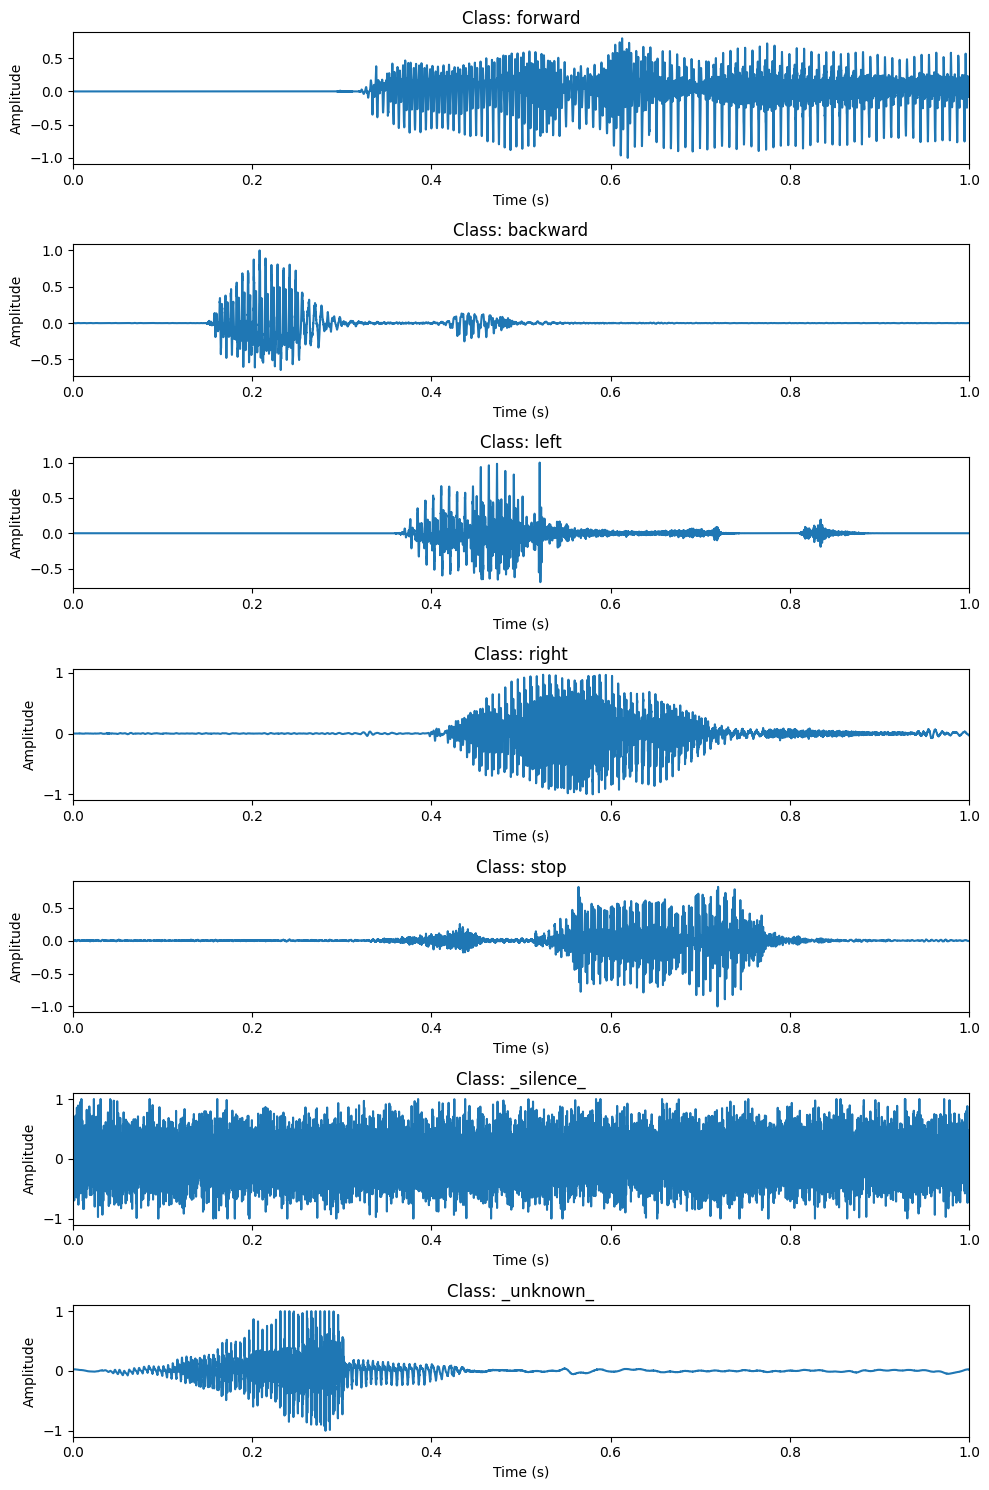

In [63]:
import random

import matplotlib.pyplot as plt

def plot_random_samples(class_files, classes):
    fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 15))

    for i, class_name in enumerate(classes):
        # Select a random file from the class
        random_file = random.choice(class_files[class_name])

        # Load and normalize the sound
        sound = load_and_normalize_sound(random_file, class_name)

        # Create time axis (assuming the sample rate is 16000 Hz)
        time_axis = np.linspace(0, len(sound) / 16000, num=len(sound))

        # Plot the sound signal
        axes[i].plot(time_axis, sound)
        axes[i].set_title(f'Class: {class_name}')
        axes[i].set_xlim([0, 1])
        axes[i].set_xlabel('Time (s)')
        axes[i].set_ylabel('Amplitude')

    plt.tight_layout()
    plt.show()

# Example usage
plot_random_samples(class_files, classes)

3. Outliers’ detection

    3.1 Create a function that returns an array with the duration of each sound of a
    given class

In [64]:
def get_sound_durations(class_name):
    durations = []
    for filename in class_files[class_name]:
        file_path = f'./dataset/{class_name}/{filename}'
        sound, sample_rate = sf.read(file_path)
        duration = len(sound) / sample_rate
        durations.append(duration)
    return np.array(durations)

# Example usage
class_name = 'left'
durations = get_sound_durations(class_name)
print(durations)

[1.     0.7895 1.     ... 1.     1.     1.    ]


    3.2 Create a function that returns an array with the average amplitude of the
    envelope of each sound of a given class

In [65]:
def get_average_envelope_amplitude(class_name, window_size=101):
    average_amplitudes = []
    for filename in class_files[class_name]:
        # Load and normalize the sound
        sound = load_and_normalize_sound(filename, class_name)

        # Compute the envelope of the sound
        env = envelope(sound, window_size)

        # Calculate the average amplitude of the envelope
        avg_amplitude = np.mean(env)
        average_amplitudes.append(avg_amplitude)

    return np.array(average_amplitudes)

# Example usage
class_name = 'left'
average_amplitudes = get_average_envelope_amplitude(class_name)
print(average_amplitudes)

[0.05790404 0.03659952 0.02367023 ... 0.06680052 0.05249993 0.0607085 ]


        UNIVARIATE APPROACH

    3.3 Create a function called that given an array of values, a method name (‘iqr’ or ‘zscore’), and any additional parameters needed, returns the outliers’ density
    and a list with the indexes of such outliers.

In [66]:
import numpy as np

def outlier_detection(array, method, threshold=3):
    n_r = len(array)
    outliers_indexes = []

    if method == 'iqr':
        Q1 = np.percentile(array, 25)
        Q3 = np.percentile(array, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers_indexes = [i for i, value in enumerate(array) if value < lower_bound or value > upper_bound]

    elif method == 'zscore':
        mean = np.mean(array)
        std_dev = np.std(array)

        outliers_indexes = [i for i, value in enumerate(array) if abs((value - mean) / std_dev) > threshold]

    else:
        raise ValueError("Invalid method. Choose 'iqr' or 'zscore'.")

    n_o = len(outliers_indexes)
    density = (n_o / n_r) * 100

    return density, outliers_indexes


# Example usage in the context of the project
class_name = 'left'
average_amplitudes = get_average_envelope_amplitude(class_name)
density, outliers_indexes = outlier_detection(average_amplitudes, method='zscore')
print(f'Density of outliers in class {class_name}: {density:.2f}%')
print(f'Outliers indexes: {outliers_indexes}')


Density of outliers in class left: 1.79%
Outliers indexes: [19, 61, 103, 325, 337, 350, 395, 479, 480, 481, 498, 630, 631, 796, 802, 913, 914, 936, 937, 938, 939, 1064, 1175, 1176, 1181, 1270, 1271, 1311, 1365, 1443, 1472, 1761, 1762, 1868, 1957, 1998, 1999, 2001, 2037, 2038, 2039, 2053, 2055, 2077, 2101, 2415, 2522, 2523, 2600, 2601, 2602, 2646, 2888, 3104, 3113, 3152, 3287, 3497, 3498, 3499, 3639, 3641, 3642, 3669, 3670, 3775, 3777, 3778]


    3.4. For each variable (duration and avg_amplitude):

3.4.1 Histogram of the variable for each class

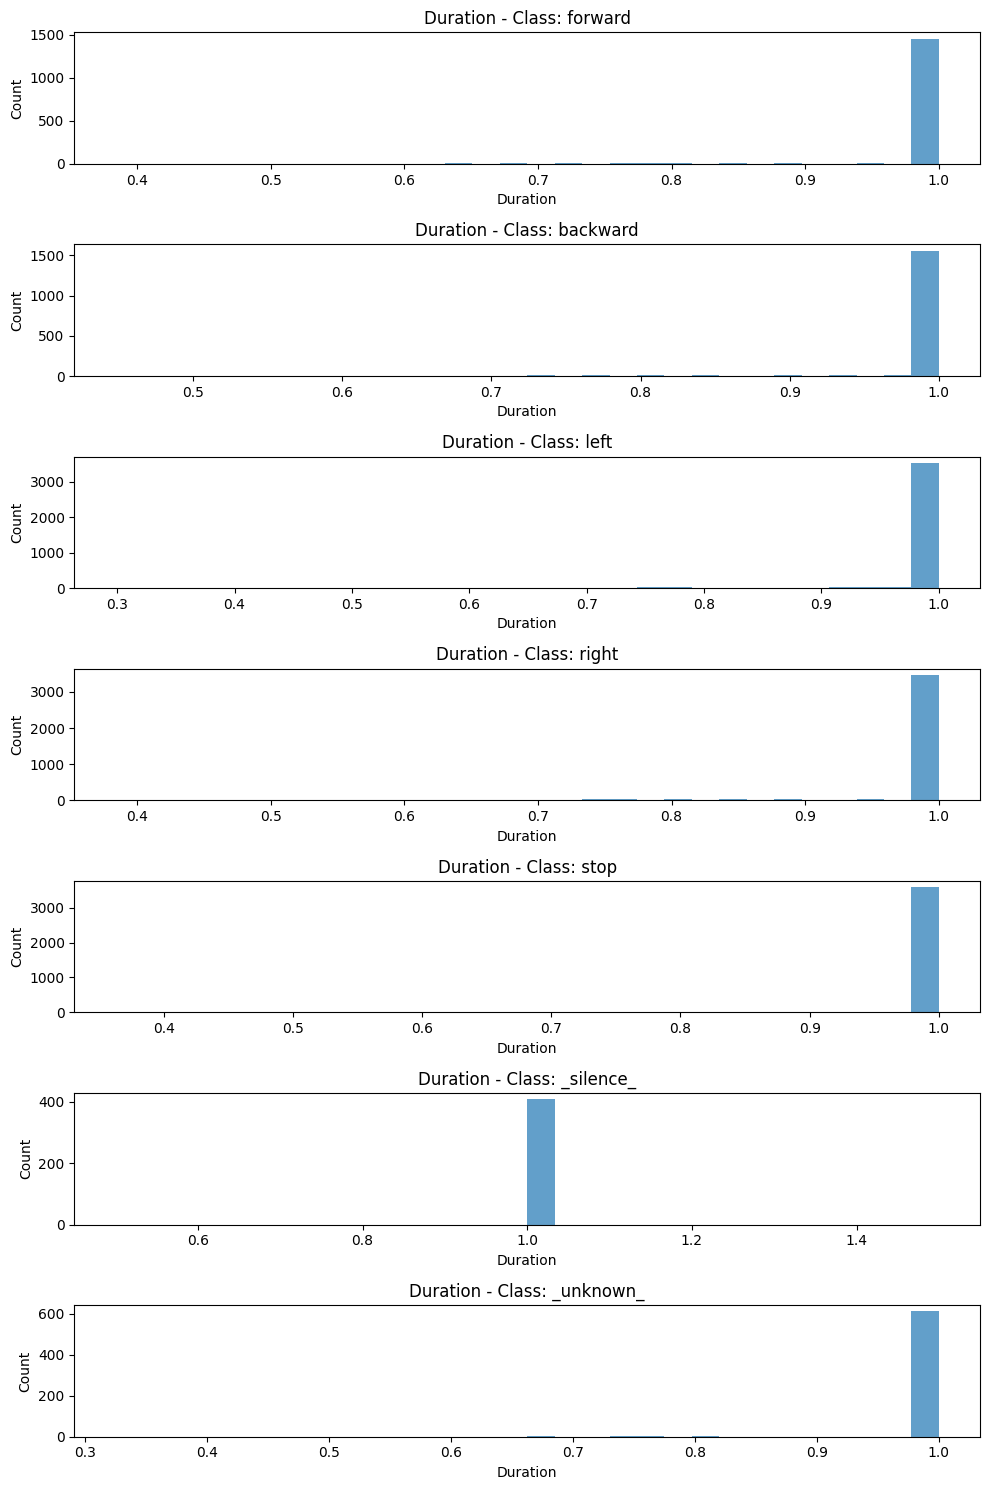

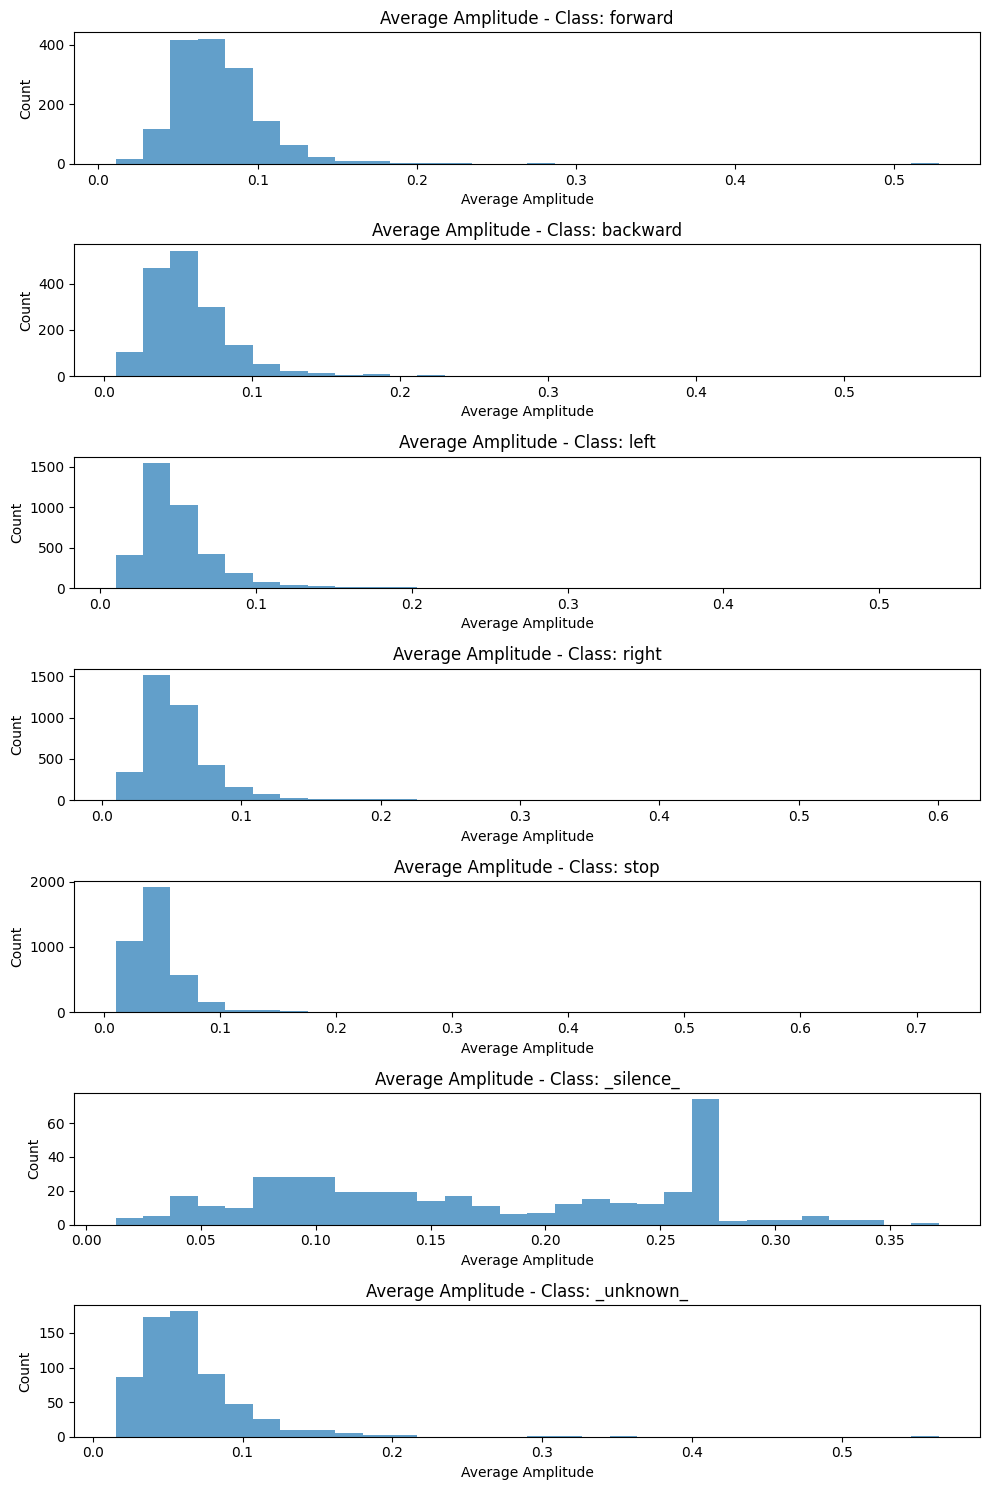

In [67]:
#For each variable (duration and avg_amplitude), plot the histogram of the variable for each class
import matplotlib.pyplot as plt

def plot_histograms(class_files, classes, variable, variable_name):
    fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 15))

    for i, class_name in enumerate(classes):
        # Get the variable values for the class
        if variable == 'duration':
            variable_values = get_sound_durations(class_name)
        elif variable == 'avg_amplitude':
            variable_values = get_average_envelope_amplitude(class_name)
        else:
            raise ValueError("Invalid variable. Choose 'duration' or 'avg_amplitude'.")

        # Plot the histogram
        axes[i].hist(variable_values, bins=30, alpha=0.7)
        axes[i].set_title(f'{variable_name} - Class: {class_name}')
        axes[i].set_xlabel(variable_name)
        axes[i].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

# Example usage
plot_histograms(class_files, classes, 'duration', 'Duration')
plot_histograms(class_files, classes, 'avg_amplitude', 'Average Amplitude')


3.4.2 Scatter plot where all points for each class with the outliers

C:\Users\User\AppData\Local\Temp\ipykernel_19328\1754121471.py:20: RuntimeWarning: invalid value encountered in scalar divide
  outliers_indexes = [i for i, value in enumerate(array) if abs((value - mean) / std_dev) > threshold]


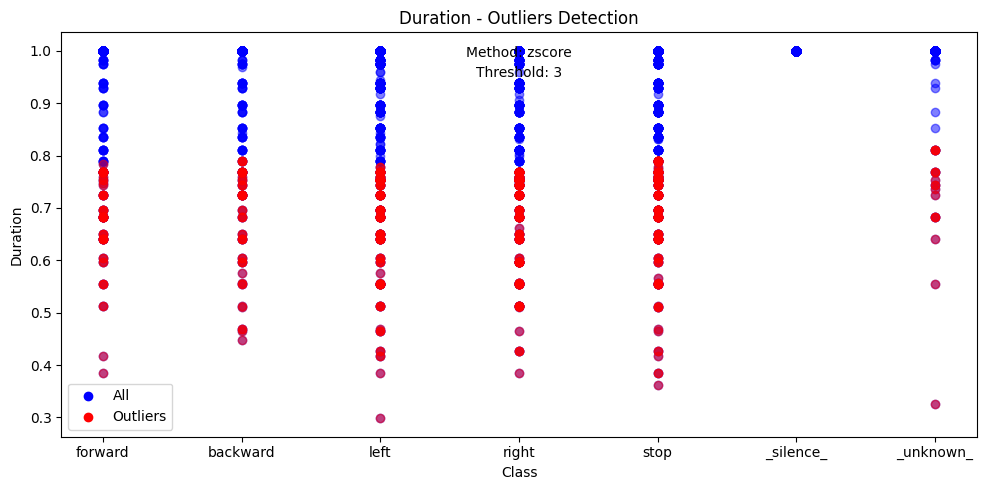

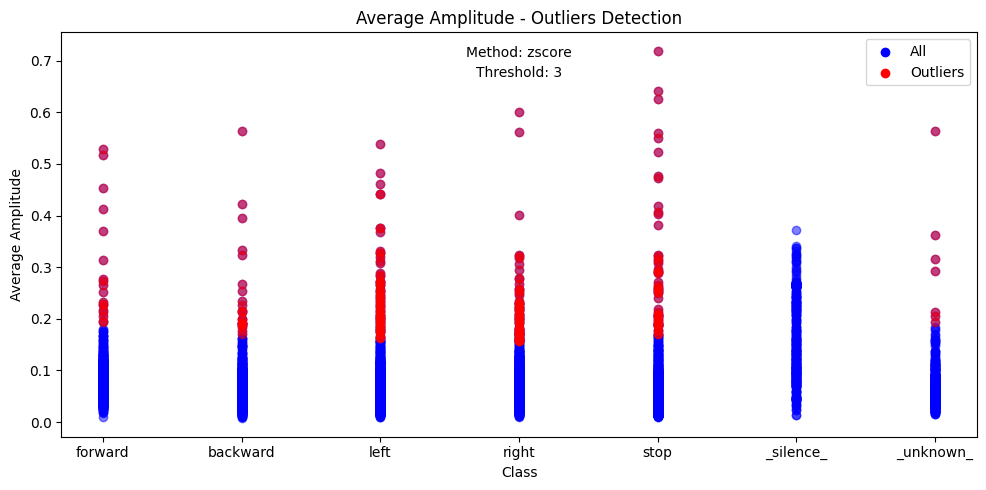

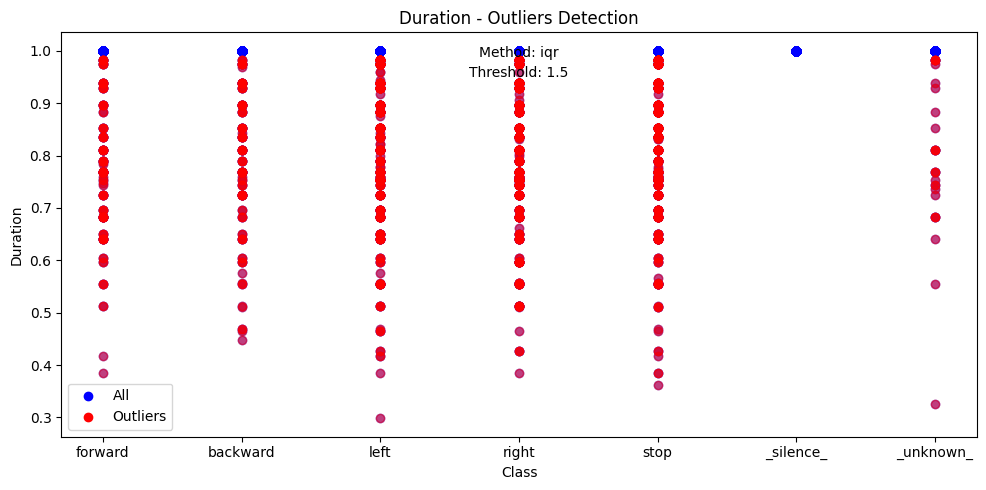

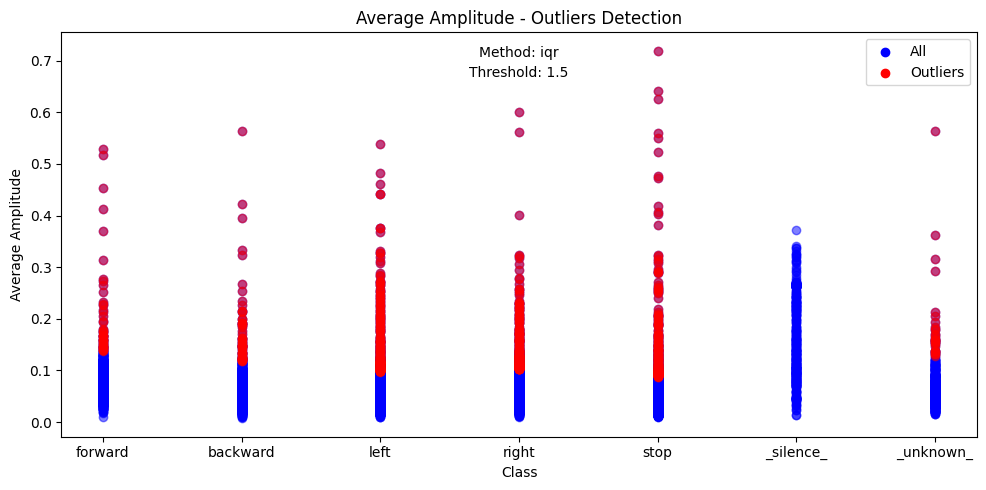

In [68]:
# For each vbariable (duration and avg_amplitude), make a scatter plot where all points for each class are presented, with the outliers showing in a different color, one for duration and one for avg_amplitude with each class in x-axis and the variable in y-axis
import matplotlib.pyplot as plt

def plot_scatter(class_files, classes, variable, variable_name, method, threshold):
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))

    for i, class_name in enumerate(classes):
        # Get the variable values for the class
        if variable == 'duration':
            variable_values = get_sound_durations(class_name)
        elif variable == 'avg_amplitude':
            variable_values = get_average_envelope_amplitude(class_name)
        else:
            raise ValueError("Invalid variable. Choose 'duration' or 'avg_amplitude'.")

        # Detect outliers
        _, outliers_indexes = outlier_detection(variable_values, method=method, threshold=threshold)

        # Plot the variable values
        axes.scatter([i] * len(variable_values), variable_values, color='blue', alpha=0.5)

        # Plot the outliers
        axes.scatter([i] * len(outliers_indexes), variable_values[outliers_indexes], color='red', alpha=0.5)

    # Make a legend for the plot
    axes.scatter([], [], color='blue', label='All')
    axes.scatter([], [], color='red', label='Outliers')
    axes.legend()

    # Make a legend for the plot of name of method and threshold
    axes.text(0.5, 0.95, f'Method: {method}', horizontalalignment='center', verticalalignment='center', transform=axes.transAxes)
    axes.text(0.5, 0.90, f'Threshold: {threshold}', horizontalalignment='center', verticalalignment='center', transform=axes.transAxes)

    # Set the x-axis labels
    axes.set_xticks(range(len(classes)))
    axes.set_xticklabels(classes)
    axes.set_title(f'{variable_name} - Outliers Detection')
    axes.set_xlabel('Class')
    axes.set_ylabel(variable_name)

    plt.tight_layout()
    plt.show()

# Example usage with zscore method
variable = 'duration'
variable_name = 'Duration'
method = 'zscore'
threshold = 3 # I choose 3 as the threshold for the zscore method because it is a common value for detecting outliers in the zscore method
plot_scatter(class_files, classes, variable, variable_name, method, threshold)

variable = 'avg_amplitude'
variable_name = 'Average Amplitude'
method = 'zscore'
threshold = 3
plot_scatter(class_files, classes, variable, variable_name, method, threshold)

#Example with IQR method
variable = 'duration'
variable_name = 'Duration'
method = 'iqr'
threshold = 1.5
plot_scatter(class_files, classes, variable, variable_name, method, threshold)

variable = 'avg_amplitude'
variable_name = 'Average Amplitude'
method = 'iqr'
threshold = 1.5 # Choose 1.5 for IQR method because it is the standard value for detecting outliers in the IQR method
plot_scatter(class_files, classes, variable, variable_name, method, threshold)



    3.4.3 Visualize, analyse and comment the outliers density for different values of k (3, 3.5 and 4) in the z-score method and between the z-score and the iqr method.

C:\Users\User\AppData\Local\Temp\ipykernel_19328\1754121471.py:20: RuntimeWarning: invalid value encountered in scalar divide
  outliers_indexes = [i for i, value in enumerate(array) if abs((value - mean) / std_dev) > threshold]


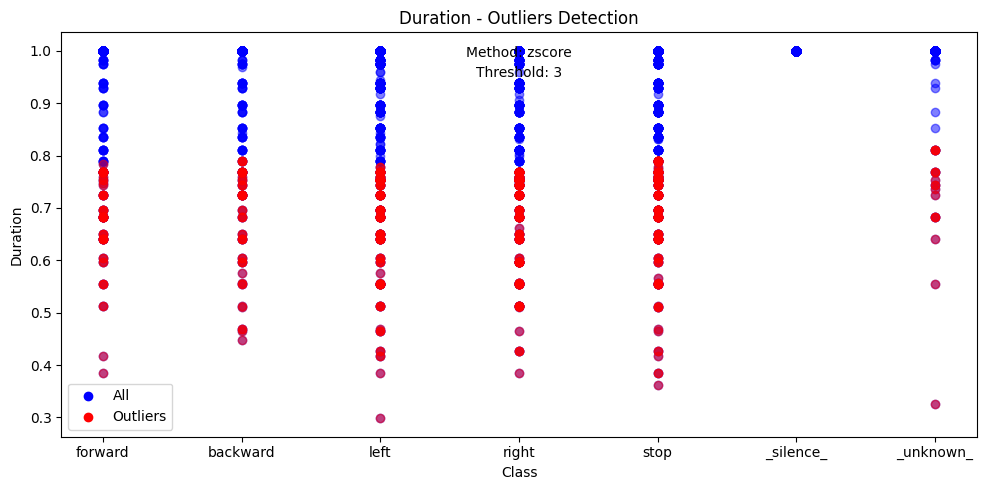

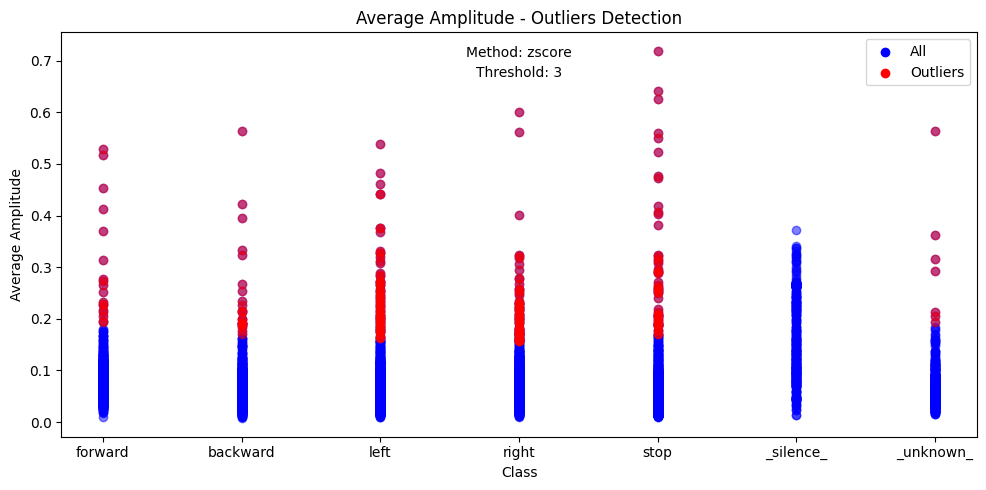

C:\Users\User\AppData\Local\Temp\ipykernel_19328\1754121471.py:20: RuntimeWarning: invalid value encountered in scalar divide
  outliers_indexes = [i for i, value in enumerate(array) if abs((value - mean) / std_dev) > threshold]


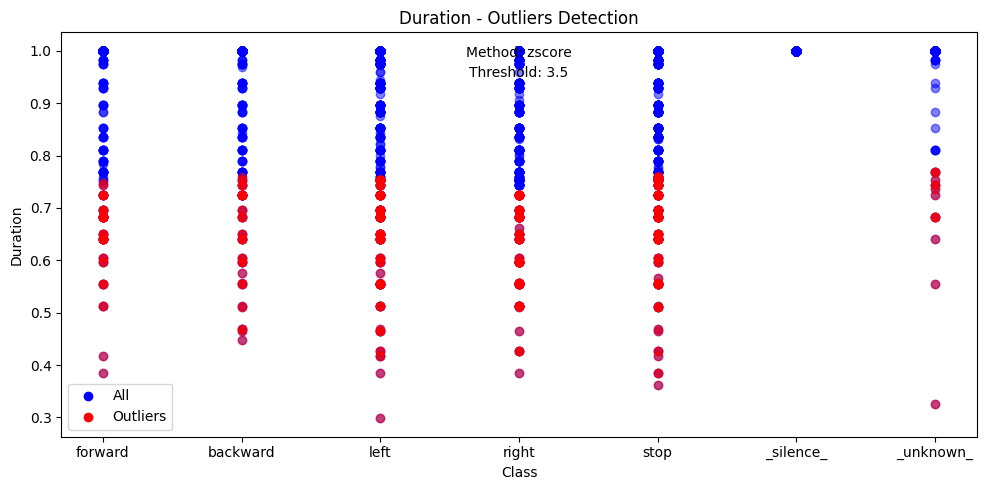

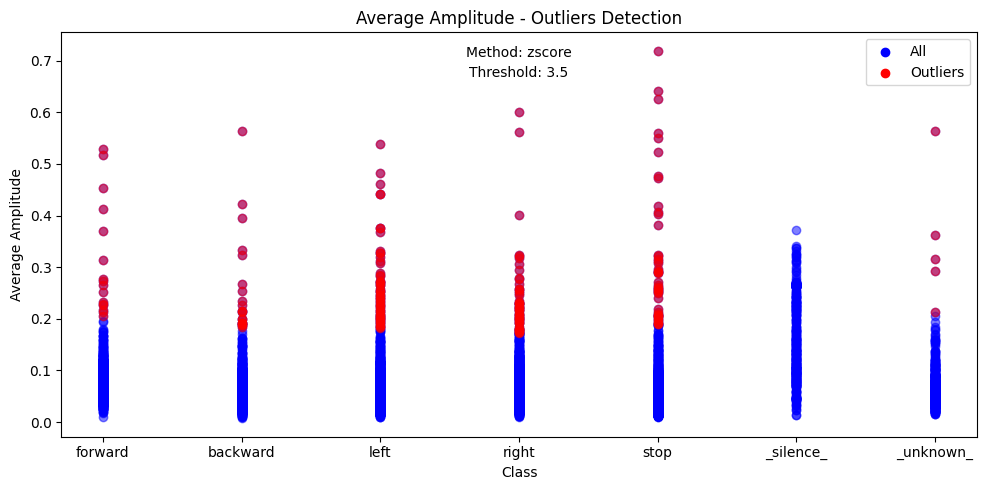

C:\Users\User\AppData\Local\Temp\ipykernel_19328\1754121471.py:20: RuntimeWarning: invalid value encountered in scalar divide
  outliers_indexes = [i for i, value in enumerate(array) if abs((value - mean) / std_dev) > threshold]


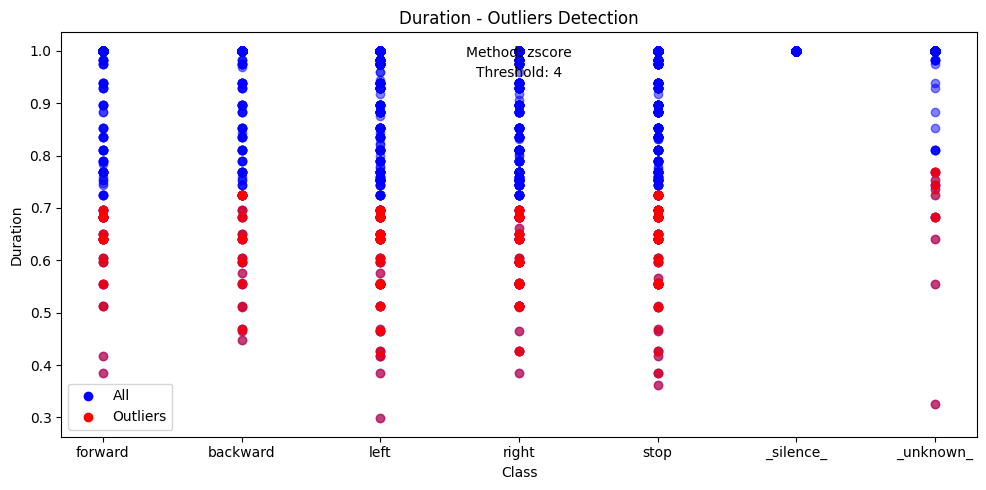

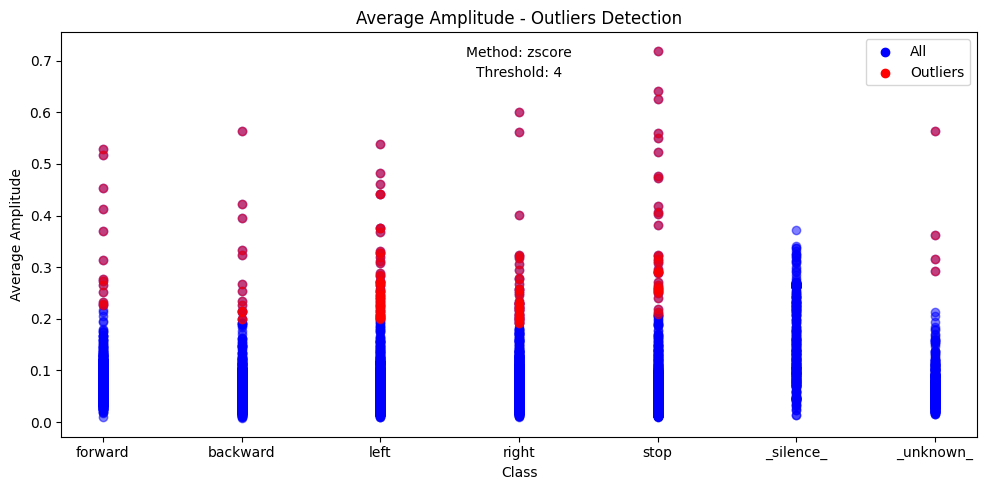

In [69]:
## Z-score method
# For k(treshhold) = 3

variable = 'duration'
variable_name = 'Duration'
method = 'zscore'
threshold = 3
plot_scatter(class_files, classes, variable, variable_name, method, threshold)

variable = 'avg_amplitude'
variable_name = 'Average Amplitude'
method = 'zscore'
threshold = 3
plot_scatter(class_files, classes, variable, variable_name, method, threshold)

# For k(treshhold) = 3.5

variable = 'duration'
variable_name = 'Duration'
method = 'zscore'
threshold = 3.5
plot_scatter(class_files, classes, variable, variable_name, method, threshold)

variable = 'avg_amplitude'
variable_name = 'Average Amplitude'
method = 'zscore'
threshold = 3.5
plot_scatter(class_files, classes, variable, variable_name, method, threshold)

# For k(treshhold) = 4

variable = 'duration'
variable_name = 'Duration'
method = 'zscore'
threshold = 4
plot_scatter(class_files, classes, variable, variable_name, method, threshold)

variable = 'avg_amplitude'
variable_name = 'Average Amplitude'
method = 'zscore'
threshold = 4
plot_scatter(class_files, classes, variable, variable_name, method, threshold)


Depois de visualizar os histogramas para os diferentes valores de treshold (3,3.5 e 4) para a densidade dos outliers no metodo Z-Score, podemos observar que à medida que o valor de k aumenta, a densidade dos outliers diminui, ou seja, são considerados mais pontos como "All" e não como "outliers (bem visivel nas classes com mais pontos) tanto para a variável "Duration" como para a variável "Avg_Amplitude". Comparando ambos os metodos (IQR e Z_score):

 -Para a variável "Duration": o metodo de deteção Z_score parece me o mais adequado para a deteção de outliters, pois a densidade de outliers, seja qual for a variação do valor de K, é mais realista e acertiva em comparação com o metodo IQR que nesta variável apresenta uma enorme densidade de outliers, onde podemos observar que quase todos os pontos sao considerados outliers( tendo por default treshold = 1.5)

 -Para a variável "Avg_Amplitude": o metodo Z_score continuan a ter menor densidade de outliers comparativamente com o IQR, porém com esta variável a diferença de densidade não é muito significativa, apresentando histogramas bastante semelhantes.

        MULTIVARIATE APPROACH

3.5 Create a function that implements K-MEANS for a given number of clusters(input parameter)

In [70]:
#For this parte, the duration and avg_amplitude will be considered together to identify the outliers

# Function that implements the K-MEANS
import numpy as np
from sklearn.cluster import KMeans

def kmeans_outliers_detection(class_files, classes, n_clusters):
    # Get the variable values for all classes
    durations = np.concatenate([get_sound_durations(class_name) for class_name in classes])
    avg_amplitudes = np.concatenate([get_average_envelope_amplitude(class_name) for class_name in classes])

    # Stack the variables together
    variables = np.stack((durations, avg_amplitudes), axis=-1)

    # Fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(variables)

    # Get the cluster centers and labels
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Get the distances to the cluster centers
    distances = np.linalg.norm(variables - cluster_centers[labels], axis=1)

    return distances

# Example usage
n_clusters = 7
distances = kmeans_outliers_detection(class_files, classes, n_clusters)
print(distances)


[0.09152491 0.0026817  0.00024228 ... 0.0010325  0.02334173 0.00779205]


3.6 Analyze the outliers of the dataset using the k-means

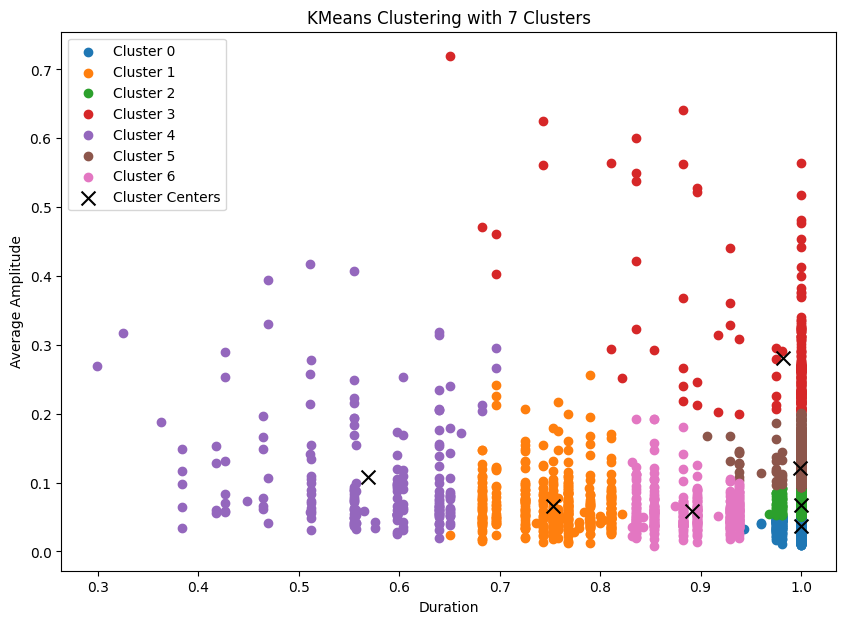

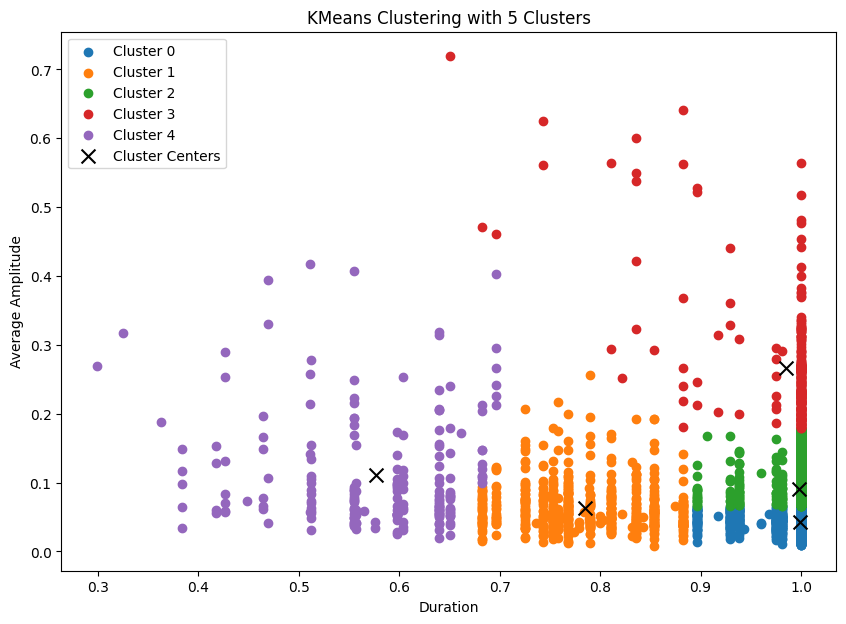

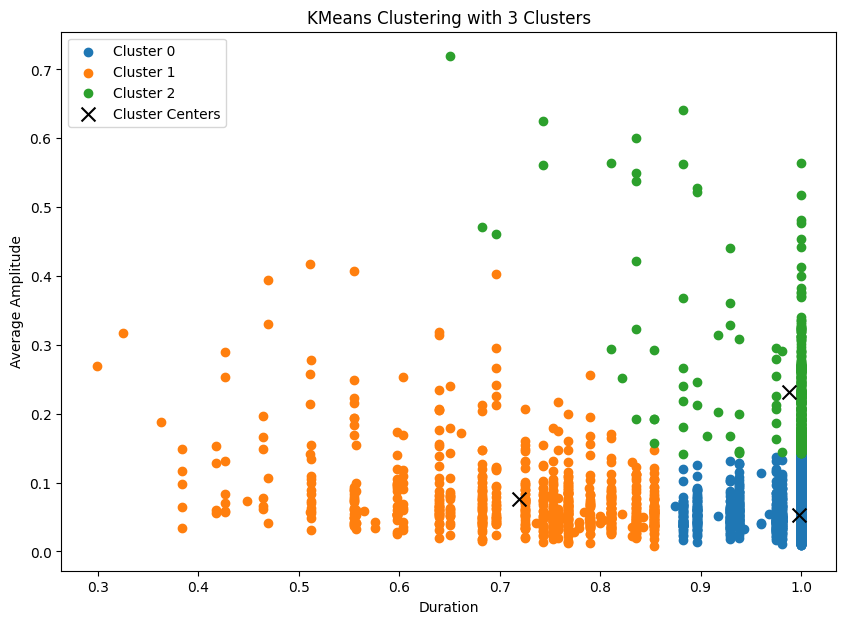

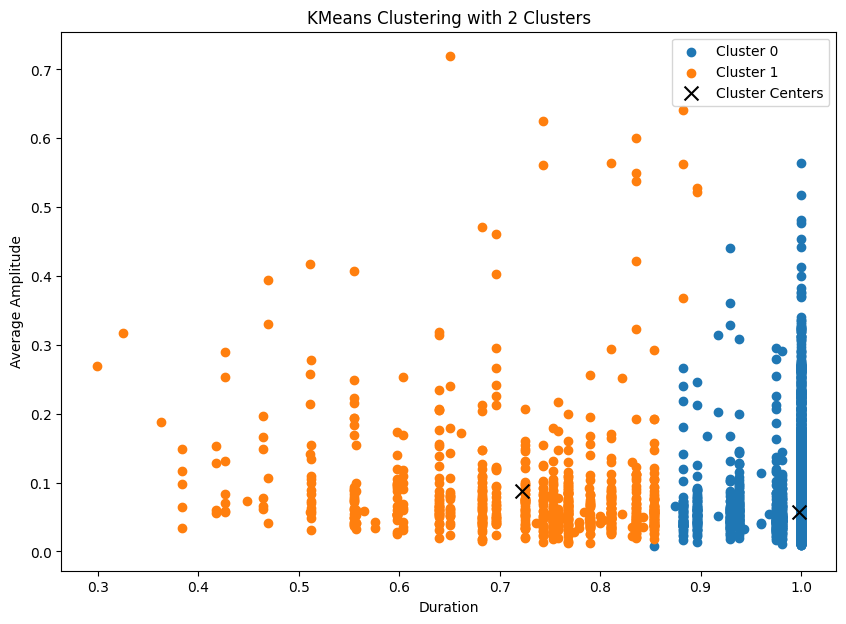

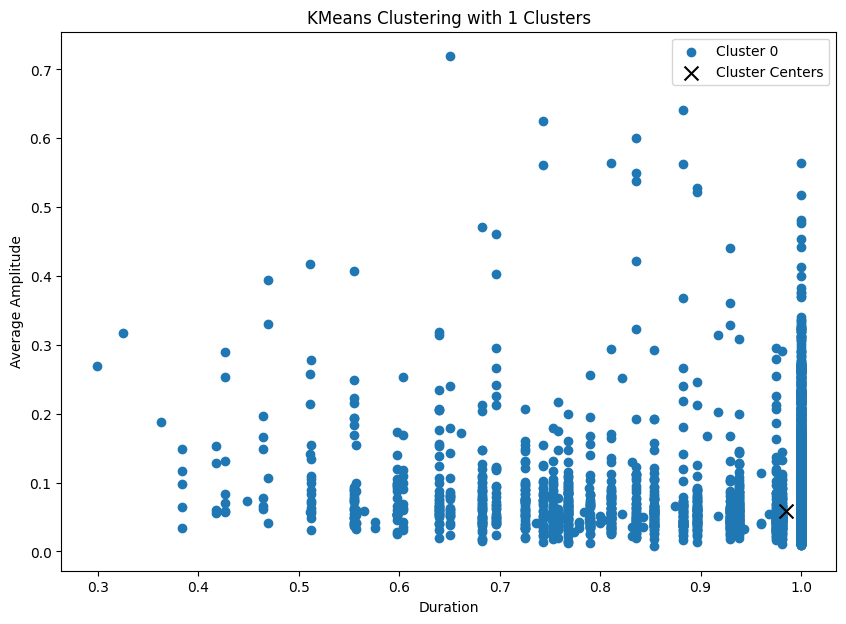

In [71]:
#Analyze the outliers of the dataset using the k-means (each sample is now characterized by two variables: duration and avg_amplitude). Try several numbers of clusters and make 2D plots to illustrate the results.
import matplotlib.pyplot as plt

def plot_kmeans_outliers(class_files, classes, n_clusters):
    # Get the variable values for all classes
    durations = np.concatenate([get_sound_durations(class_name) for class_name in classes])
    avg_amplitudes = np.concatenate([get_average_envelope_amplitude(class_name) for class_name in classes])

    # Stack the variables together
    variables = np.stack((durations, avg_amplitudes), axis=-1)

    # Fit the KMeans model
    kmeans = KMeans(n_clusters=n_clusters, random_state=0).fit(variables)

    # Get the cluster centers and labels
    cluster_centers = kmeans.cluster_centers_
    labels = kmeans.labels_

    # Plot the 2D scatter plot
    plt.figure(figsize=(10, 7))
    for i in range(n_clusters):
        cluster_points = variables[labels == i]
        plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i}')

    # Plot the cluster centers
    plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='x', s=100, label='Cluster Centers')

    plt.title(f'KMeans Clustering with {n_clusters} Clusters')
    plt.xlabel('Duration')
    plt.ylabel('Average Amplitude')
    plt.legend()
    plt.show()

# Example usage
n_clusters = 7
plot_kmeans_outliers(class_files, classes, n_clusters)

n_clusters = 5
plot_kmeans_outliers(class_files, classes, n_clusters)

n_clusters = 3
plot_kmeans_outliers(class_files, classes, n_clusters)

n_clusters = 2
plot_kmeans_outliers(class_files, classes, n_clusters)

n_clusters = 1
plot_kmeans_outliers(class_files, classes, n_clusters)



3.7 Compare the results of 3.6 with the results of 3.4. Comment the differences(If any)



        4. DATA IMPUTATION: In this section, we will artificially inject outliers in the dataset and evaluate
        our capacity to recover those values with a linear model.

4.1 For this exercise, we will create a miniature dataset. Let us consider only the first 200 songs of each class. For each song, we will use the envelope of the song (as implemented in 2.4) and downsample it with a factor of 100 (for
each 100 data points of the envelope, we will keep only the first one and discard the remaining 99). Then, we will concatenate all the sounds within each class in one single unidimensional array.

In [72]:
#Create a miniature dataset by downsampling the envelope of the sounds by a factor of 100
def miniature_dataset(class_files, window_size, classes, downsample_factor = 100):
    # Initialize the dataset
    miniature_dataset ={}

    for class_name, files in class_files.items():
        class_envelopes = []
        selected_files = files[:200]

        for filename in selected_files:

            sound = load_and_normalize_sound(filename, class_name)

            # Compute the envelope of the sound
            env = envelope(sound, window_size)

            # Downsample the envelope
            downsampled_env = env[::downsample_factor]

            class_envelopes.extend(downsampled_env)

        miniature_dataset[class_name] = np.array(class_envelopes)

    return miniature_dataset

# Example usage
window_size = 5
miniature_data = miniature_dataset(class_files, window_size, classes)
print(miniature_data)




{'forward': array([0.00019529, 0.00086483, 0.00198075, ..., 0.00036353, 0.00054529,
       0.00084823]), 'backward': array([0.04468242, 0.06246664, 0.08441871, ..., 0.45446957, 0.48784344,
       0.30120756]), 'left': array([3.95804469e-05, 5.54126280e-05, 1.34573519e-04, ...,
       2.14419726e-04, 1.14867712e-04, 1.37841253e-04]), 'right': array([0.00037608, 0.00136758, 0.00098295, ..., 0.0029791 , 0.00675941,
       0.00202491]), 'stop': array([0.02673237, 0.06295042, 0.04582692, ..., 0.00250119, 0.00218458,
       0.00098148]), '_silence_': array([4.44938801e-04, 8.45383764e-03, 5.33926599e-03, ...,
       5.12887591e-01, 1.43050561e-01, 2.72737148e-01]), '_unknown_': array([0.00046228, 0.00091756, 0.00058836, ..., 0.        , 0.        ,
       0.        ])}


        4.2 Create a function that injects x% of outliers in a given array. Select randomly x% of the elements of the array and update their value to 1.5.

IQR METHOD
Density of outliers in class forward WITH IQR METHOD: 12.24%
Density of outliers in class backward WITH IQR METHOD: 12.61%
Density of outliers in class left WITH IQR METHOD: 16.25%
Density of outliers in class right WITH IQR METHOD: 13.95%
Density of outliers in class stop WITH IQR METHOD: 15.43%
Density of outliers in class _silence_ WITH IQR METHOD: 5.11%
Density of outliers in class _unknown_ WITH IQR METHOD: 12.77%
Z_SCORE METHOD
Density of outliers in class forward WITH Z_SCORE METHOD: 3.01%
Density of outliers in class backward WITH Z_SCORE METHOD: 3.01%
Density of outliers in class left WITH Z_SCORE METHOD: 3.10%
Density of outliers in class right WITH Z_SCORE METHOD: 3.03%
Density of outliers in class stop WITH Z_SCORE METHOD: 3.04%
Density of outliers in class _silence_ WITH Z_SCORE METHOD: 3.00%
Density of outliers in class _unknown_ WITH Z_SCORE METHOD: 3.04%


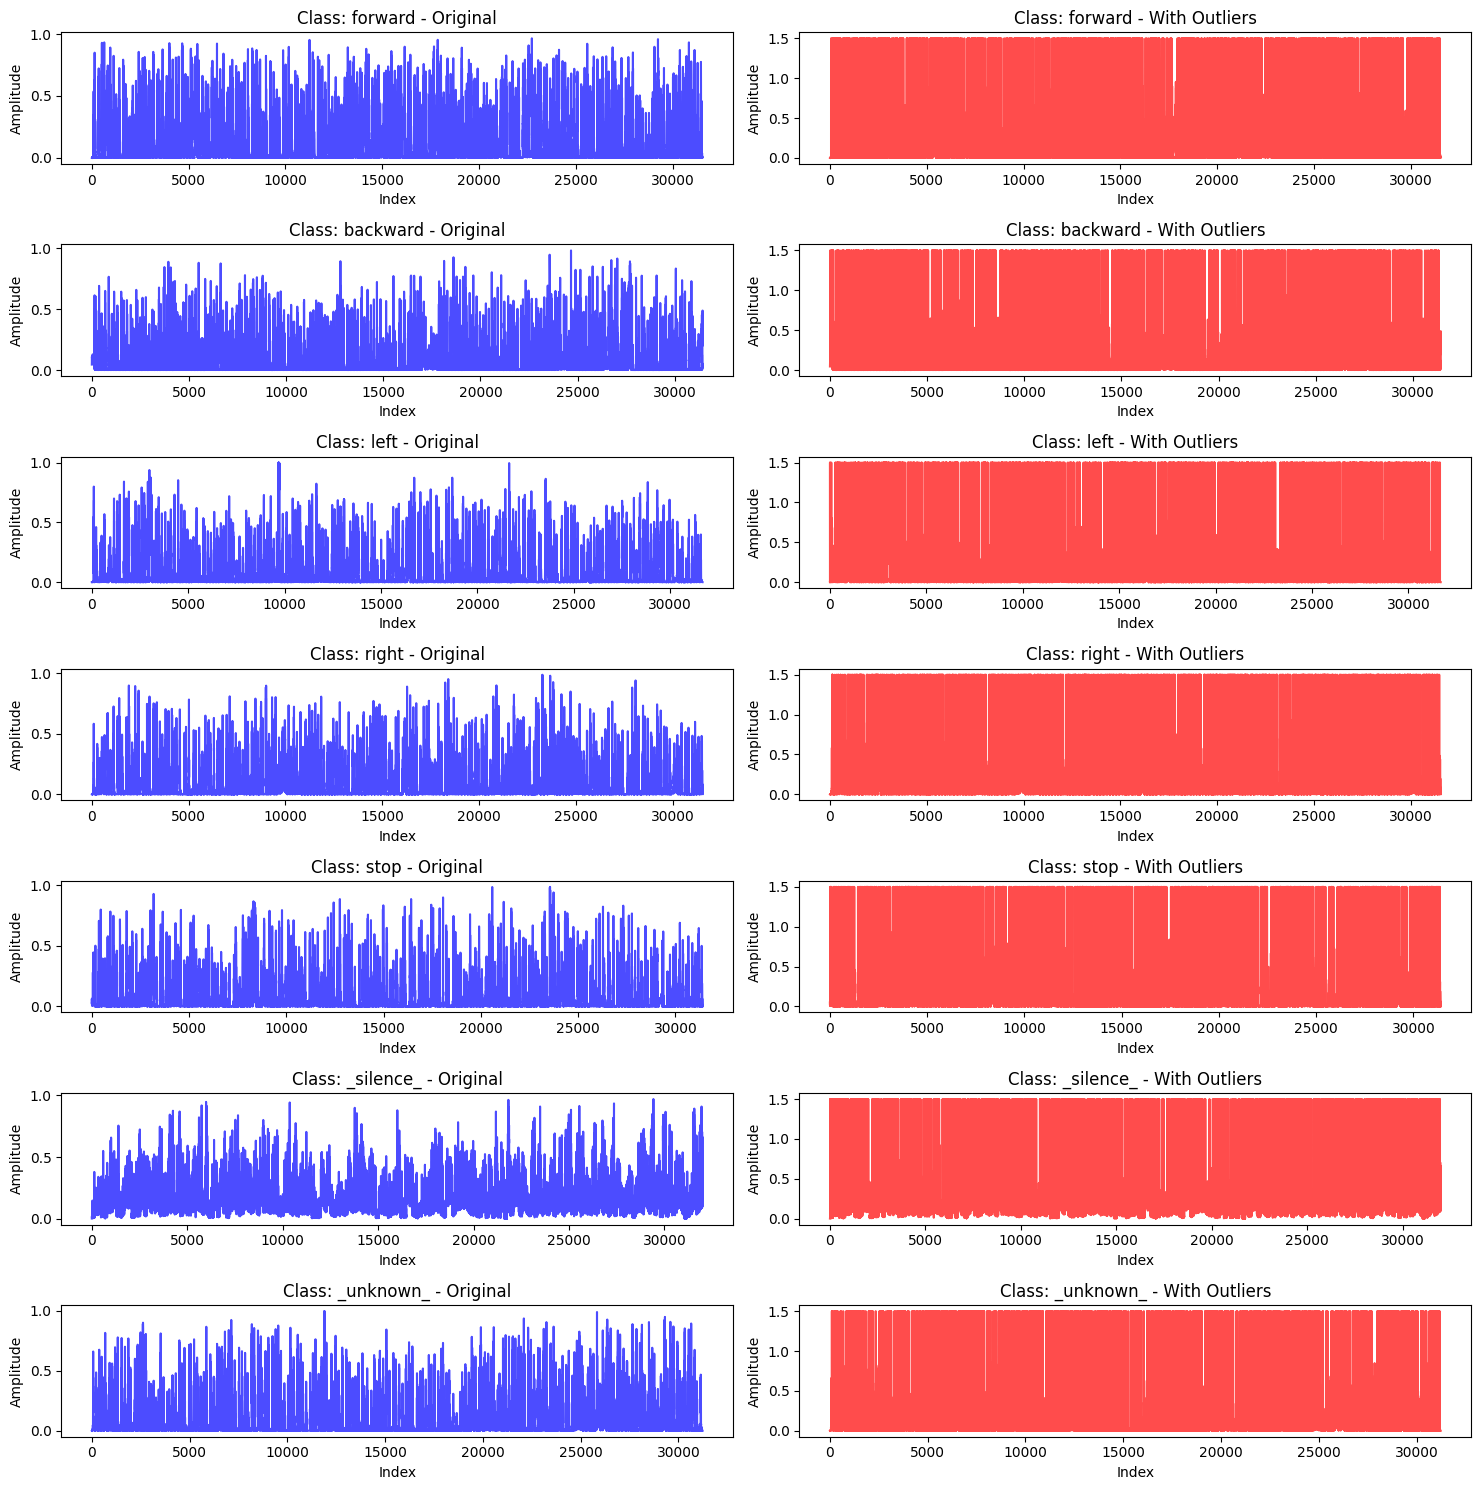

In [73]:
#Function to inject x% of outliers in a given array, select x% of the elements of the array and update their value to 1.5 (since the envelope of the song is contained in the range [0, 1], the points will become outliers).
def inject_outliers(dataset, percentage):
    outliers_dataset = dataset.copy()

    num_outliers = int(percentage * len(dataset))
    outlier_indices = np.random.choice(len(dataset), size = num_outliers, replace=False)
    outliers_dataset[outlier_indices] = 1.5 # Update the value to 1.5

    return outliers_dataset, outlier_indices

## 4.2.1 Injecting 3% of outliers in the miniature dataset
percentage = 0.03
outliers_miniature_data = {}

for class_name, data in miniature_data.items():
    outliers_miniature_data[class_name], outlier_indices = inject_outliers(data, percentage)


#Visualize the outliers with the methods IQR and Z-score
# IQR method
print('IQR METHOD')
method = 'iqr'
threshold = 1.5
for class_name, data in outliers_miniature_data.items():
    density, outliers_indexes = outlier_detection(data, method=method, threshold=threshold)
    print(f'Density of outliers in class {class_name} WITH IQR METHOD: {density:.2f}%')

# Z-score method
print('Z_SCORE METHOD')
method = 'zscore'
threshold = 3
for class_name, data in outliers_miniature_data.items():
    density, outliers_indexes = outlier_detection(data, method=method, threshold=threshold)
    print(f'Density of outliers in class {class_name} WITH Z_SCORE METHOD: {density:.2f}%')


#Plot the outliers in the miniature dataset
import matplotlib.pyplot as plt

def plot_outliers(miniature_data, outliers_miniature_data):
    fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 15))

    for i, class_name in enumerate(classes):
        # Plot the original dataset
        axes[i, 0].plot(miniature_data[class_name], color='blue', alpha=0.7)
        axes[i, 0].set_title(f'Class: {class_name} - Original')
        axes[i, 0].set_xlabel('Index')
        axes[i, 0].set_ylabel('Amplitude')

        # Plot the dataset with outliers
        axes[i, 1].plot(outliers_miniature_data[class_name], color='red', alpha=0.7)
        axes[i, 1].set_title(f'Class: {class_name} - With Outliers')
        axes[i, 1].set_xlabel('Index')
        axes[i, 1].set_ylabel('Amplitude')

    plt.tight_layout()
    plt.show()


plot_outliers(miniature_data, outliers_miniature_data)






4.3 We will now try to recover the original values using a linear model of order p. Creating a function that receives n training samples of vectors with size p, meaning (x^i,1, etc.) and the corresponding output yi.

In [74]:
# Try to recover the original values of the miniature dataset using a linear model of order p.
# Function that receives n training samples of vectors with size p and returns the coefficients of the linear model
def coefficients_calculator(X, Y):
    X_intercept = np.hstack([np.ones((X.shape[0], 1)), X])
    beta_coefficients = np.linalg.inv(X_intercept.T @ X_intercept) @ X_intercept.T @ Y
    return beta_coefficients

def predict_values(X, beta_coefficients):
    X_intercept = np.hstack([np.ones((X.shape[0], 1)), X])
    Y_pred = X_intercept @ beta_coefficients
    return Y_pred

def prepare_data(dataset, p):
    n = len(dataset)
    X = np.array([dataset[i:i+p] for i in range(n-p)])
    Y = np.array([dataset[i + p] for i in range(n-p)])

    return X, Y




4.4 FINDING THE BEST P VALUE

In [75]:
# Function to substitute the outliers with the linear model
def recover_outliers(outliers_miniature_data, p, coefficients_calculator, predict_values, outlier_indices):
    recovery_data = {}
    for class_name, data in outliers_miniature_data.items():
        X, Y = prepare_data(data, p)
        beta = coefficients_calculator(X, Y)
        Y_pred = predict_values(X, beta)

        # Replace the outliers with the predicted values with index verification
        data_recovered = data.copy()

        #Ajust to tolerate outlier indexes that are numpy.ndarray
        outlier_index_class = outlier_indices[class_name] if class_name in outlier_indices else []
        for outlier_index in outlier_index_class:
            pred_idx = outlier_index - p
            if 0 <= pred_idx < len(Y_pred):
                data_recovered[outlier_index] = Y_pred[pred_idx]

        recovery_data[class_name] = data_recovered

    return recovery_data





In [76]:
# Function to calculate and plot the distribution of the prediction error for each class
def plot_prediction_error(miniature_data, recovery_data):
    fig, axes = plt.subplots(nrows=7, ncols=1, figsize=(10, 15))
    error_per_class = {}

    for class_name, data in miniature_data.items():
        if class_name in recovery_data:
            error = data - recovery_data[class_name]
            error_per_class[class_name] = error

    for class_name, error in error_per_class.items():
        axes[classes.index(class_name)].hist(error, bins=30, alpha=0.7)
        axes[classes.index(class_name)].set_title(f'Class: {class_name}')
        axes[classes.index(class_name)].set_xlabel('Error')
        axes[classes.index(class_name)].set_ylabel('Count')

    plt.tight_layout()
    plt.show()

In [78]:
#Function to plot the comparison between the original and the recovered data envelops
def plot_comparison_envelops(miniature_data, recovery_data):
    fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 15))

    for class_name, data in miniature_data.items():
        recover_data = recovery_data[class_name]

        # Plot the original dataset
        axes[classes.index(class_name), 0].plot(data, color='blue', alpha=0.7)
        axes[classes.index(class_name), 0].set_title(f'Class: {class_name} - Original')
        axes[classes.index(class_name), 0].set_xlabel('Index')
        axes[classes.index(class_name), 0].set_ylabel('Amplitude')


        # Plot the recovered dataset
        axes[classes.index(class_name), 1].plot(recover_data, color='red', alpha=0.7)
        axes[classes.index(class_name), 1].set_title(f'Class: {class_name} - Recovered')
        axes[classes.index(class_name), 1].set_xlabel('Index')
        axes[classes.index(class_name), 1].set_ylabel('Amplitude')

    plt.tight_layout()
    plt.show()


In [79]:
# Function to determinate the best p value
def best_p_value(miniature_data, coefficients_calculator, predict_values, max_p= 20):
    best_p = None
    min_error = float('inf')
    for p in range(1, max_p):
      errors = []
      for class_name, data in miniature_data.items():
          X, Y = prepare_data(data, p)
          beta = coefficients_calculator(X, Y)
          Y_pred = predict_values(X, beta)
          error = np.mean((Y - Y_pred) ** 2)
          errors.append(error)
      mean_error = np.mean(errors)
      if mean_error < min_error:
          min_error = mean_error
          best_p = p
    return best_p, min_error

Best p value: 19 with an minimum error of 0.01


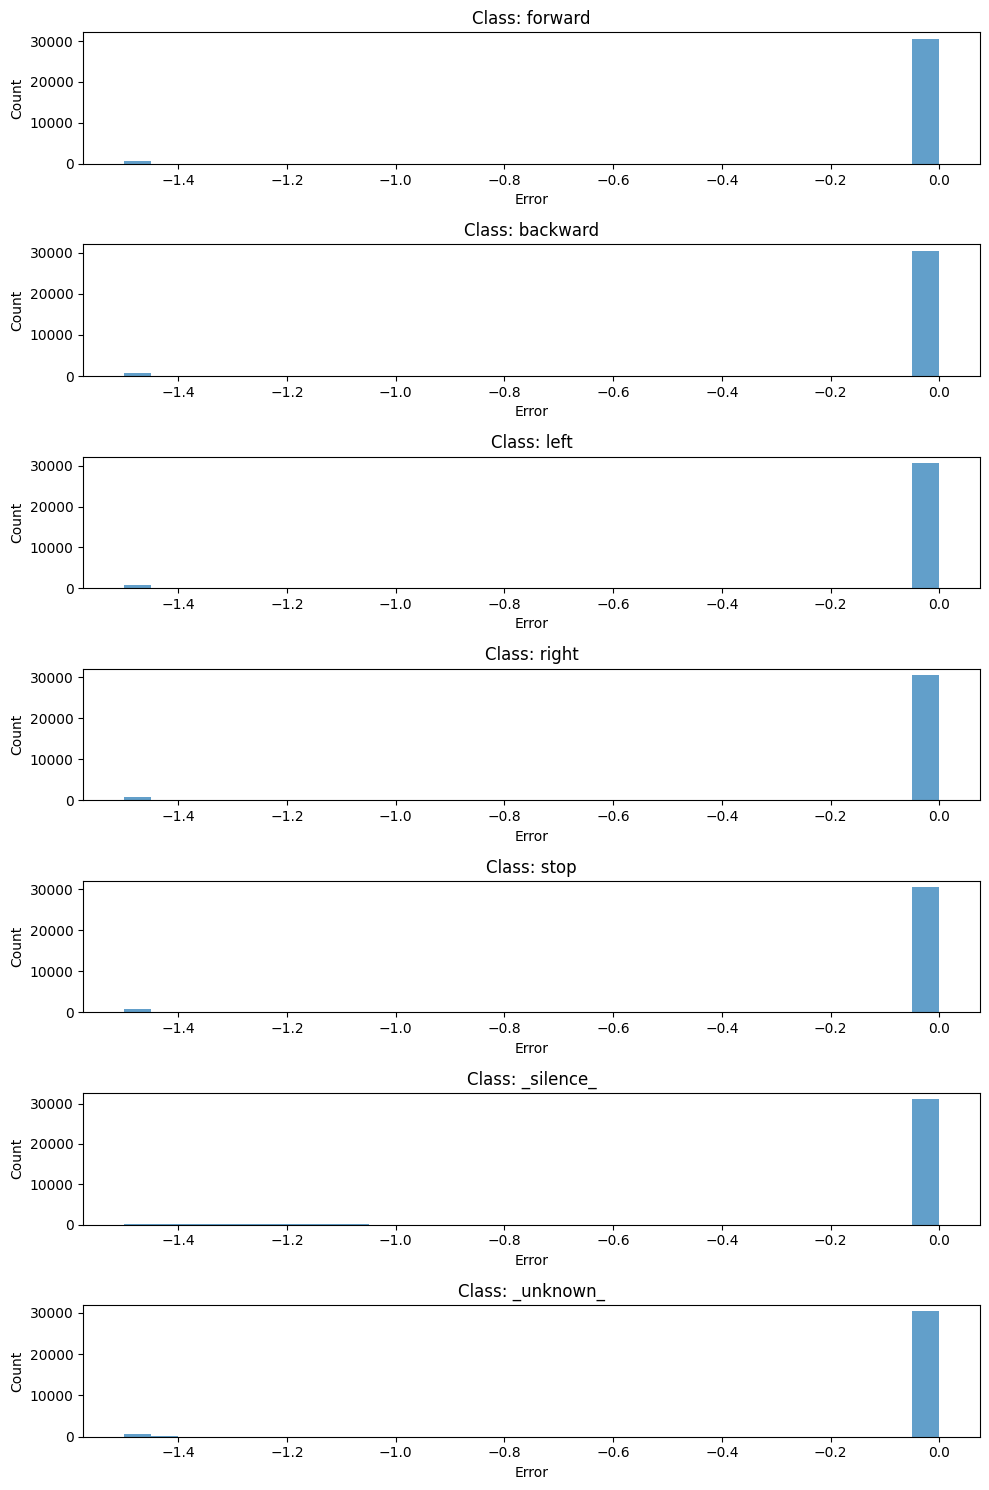

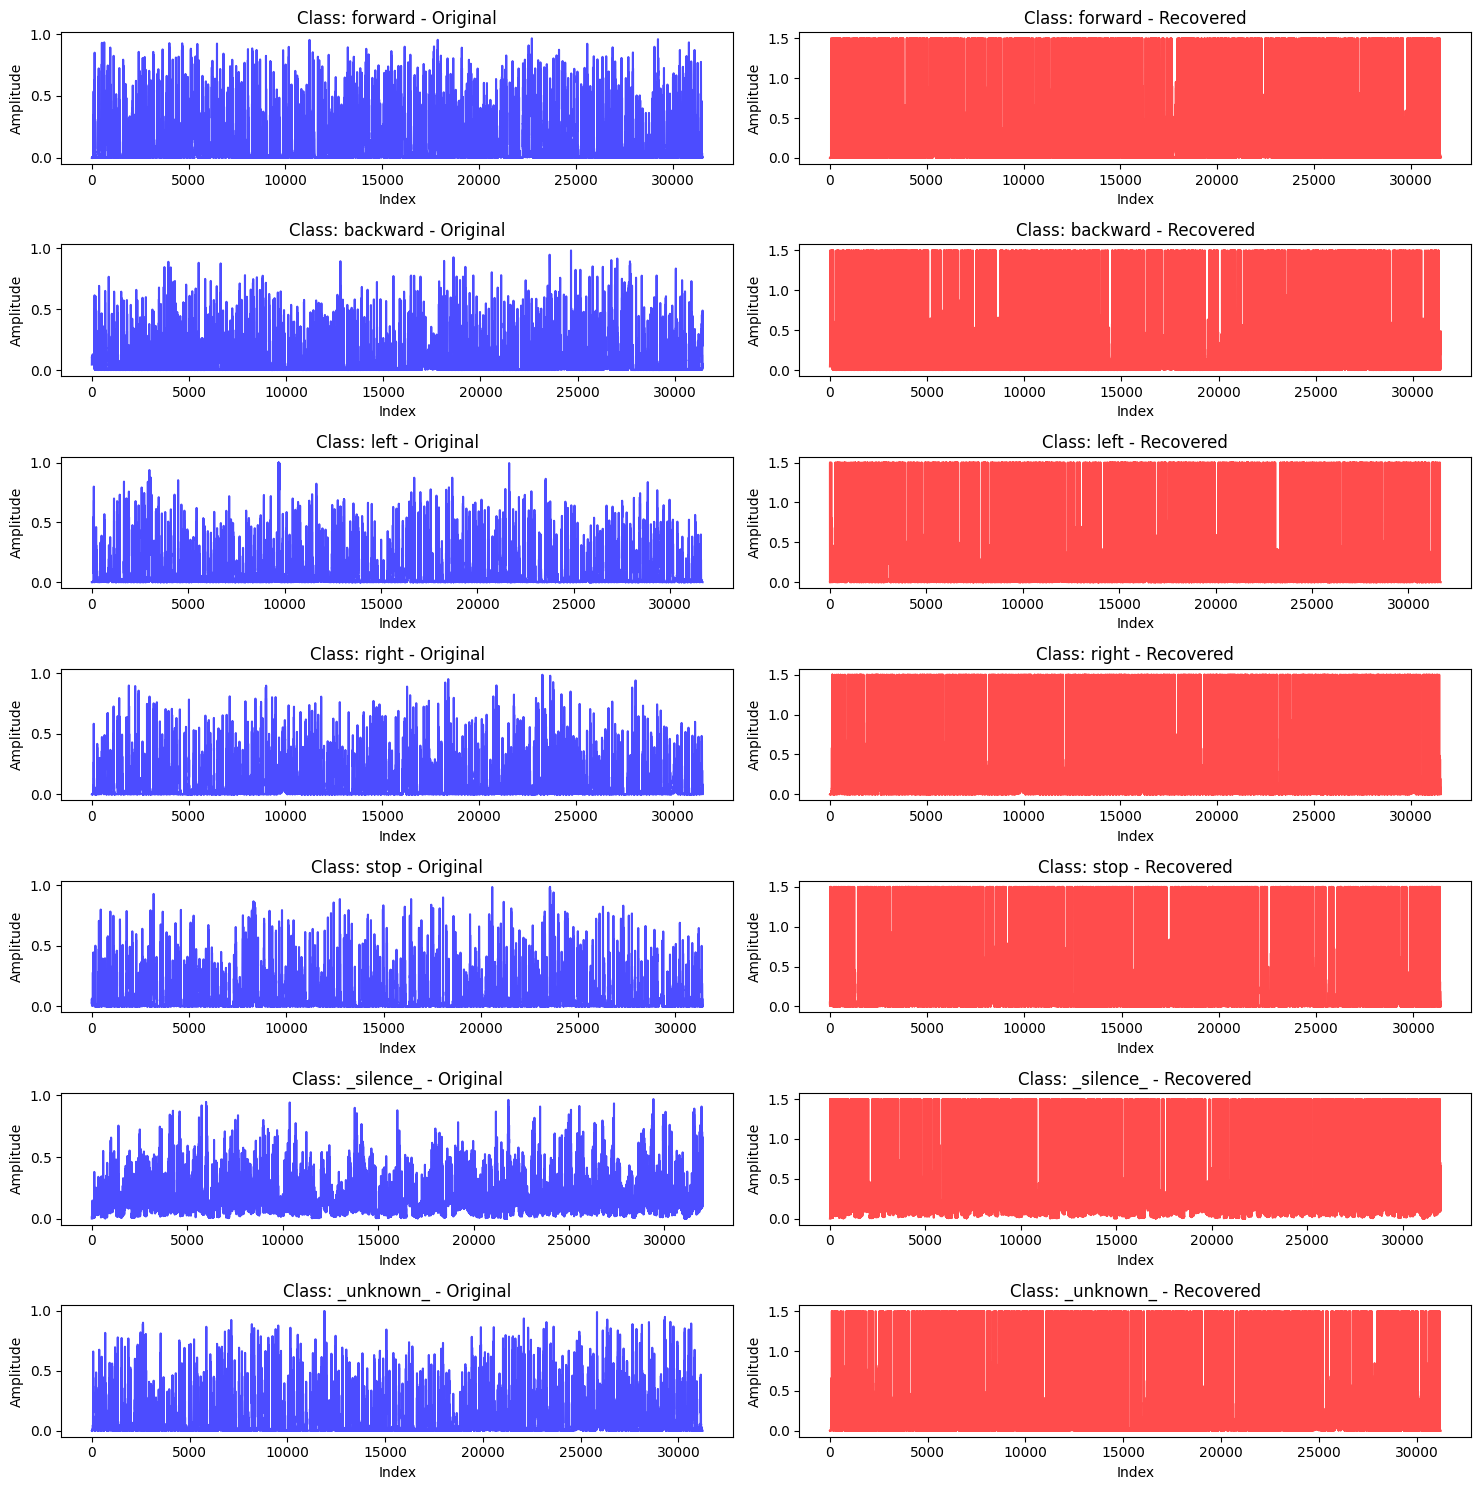

In [80]:
# Example usage
best_p, min_error = best_p_value(miniature_data, coefficients_calculator, predict_values)
print(f'Best p value: {best_p} with an minimum error of {min_error:.2f}')

#Recover the outliers
data_recovered = recover_outliers(outliers_miniature_data, best_p, coefficients_calculator, predict_values, outlier_indices)

#Plot the prediction error
plot_prediction_error(miniature_data, data_recovered)

#Plot the comparison between the original and the recovered data envelops
plot_comparison_envelops(miniature_data, data_recovered)

4.5 Repeat the 4.4 using a window of order p centered in the instant to predict. Compare the errors with the results obtained in 4.4.


Original method: Best p value: 19 with an minimum error of 0.0069
Centered method: Best p value: 1 with an minimum error of 0.0000
CENTERED METHOD


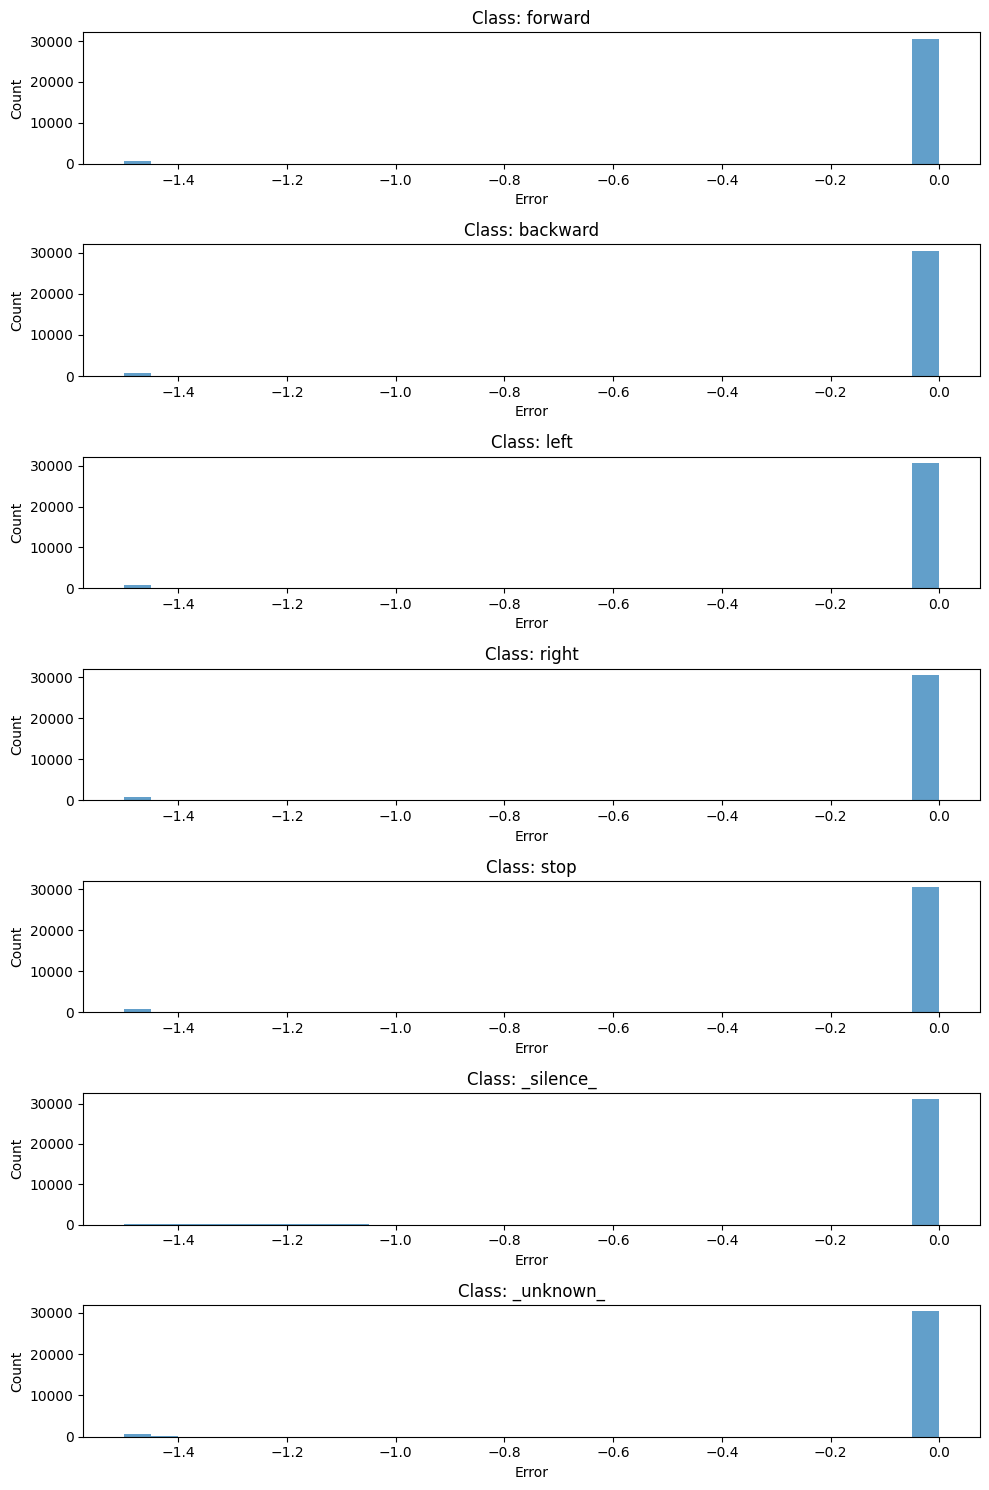

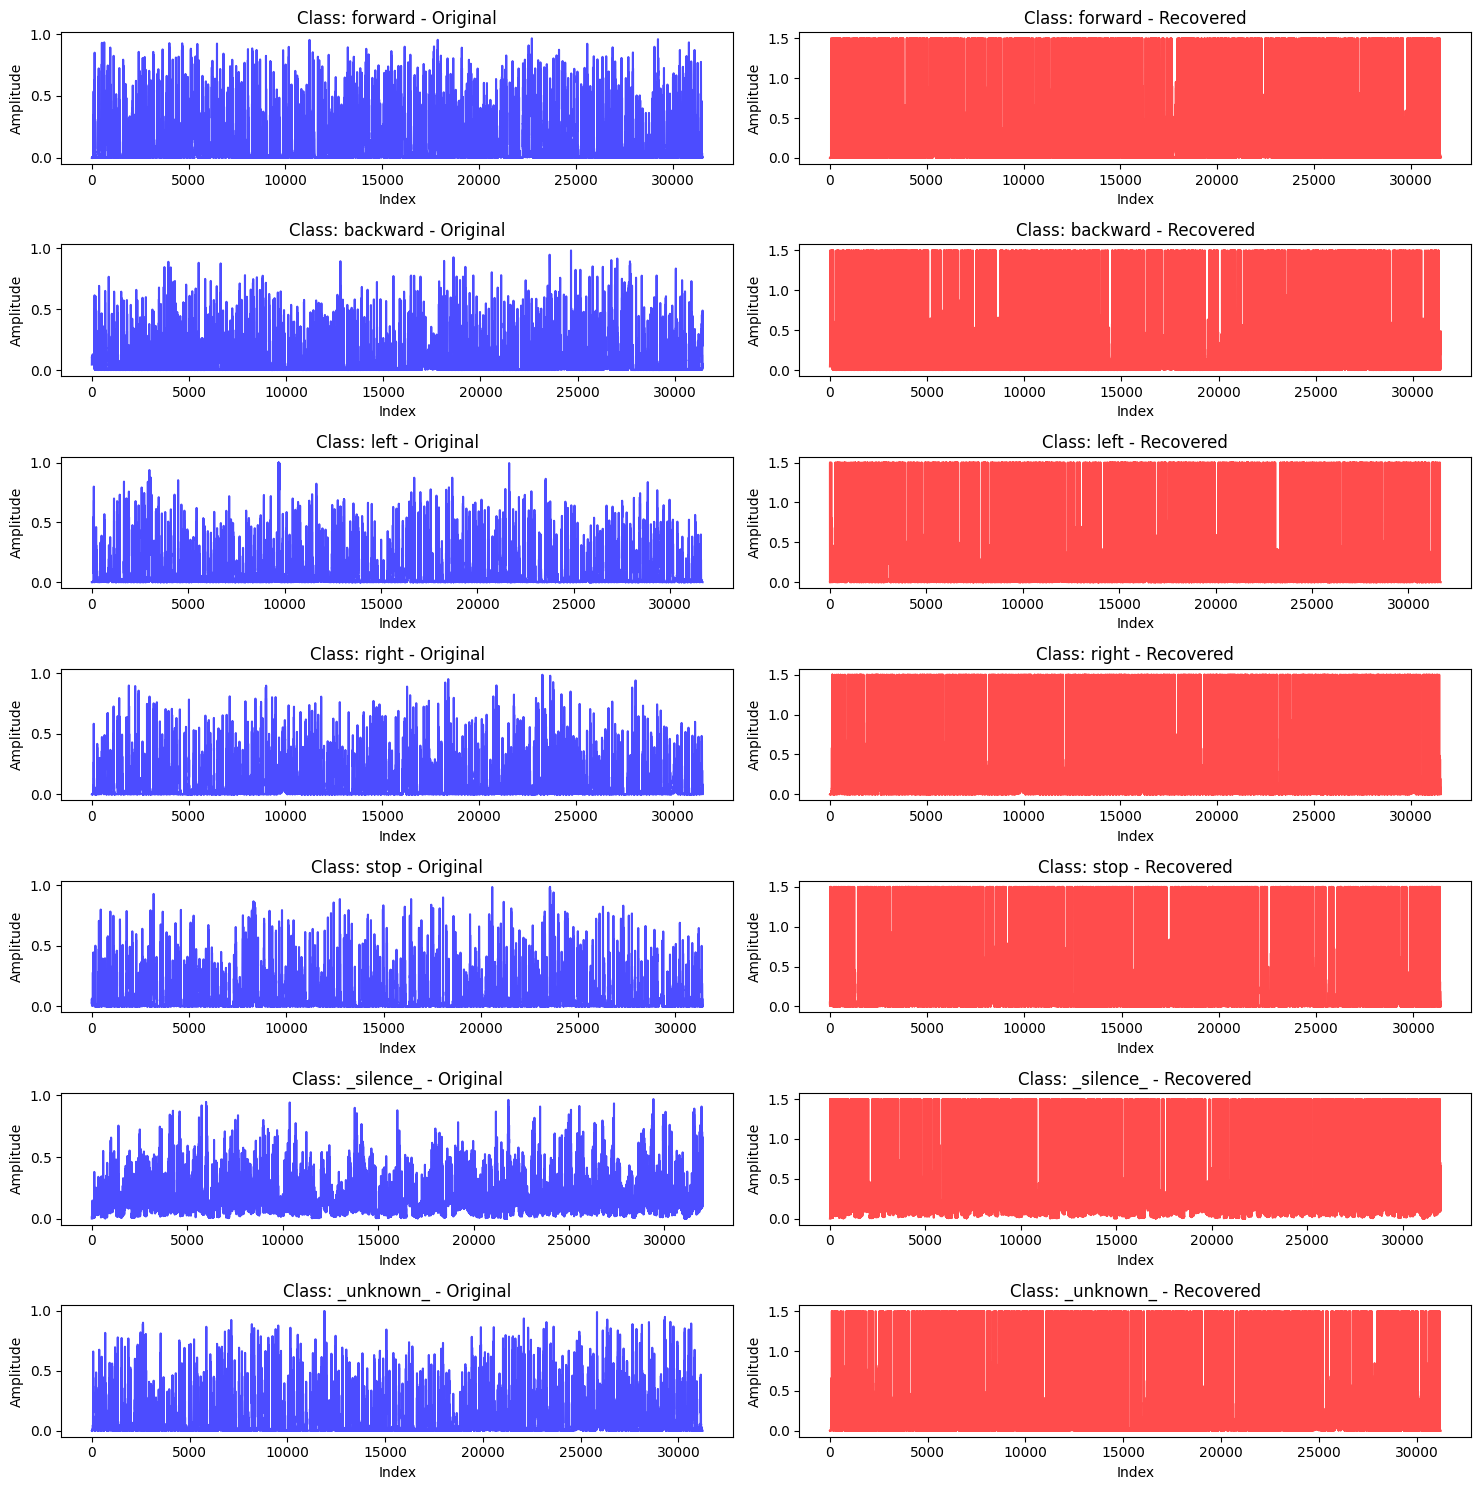

In [81]:
# To repeat the same but using a window of order p centered in the instant to predict, we can just modify the prepare_data function to return the X and Y values centered in the instant to predict.
def prepare_data_centered(dataset, p):
    X = []
    Y = []
    for i in range(p, len(dataset) - p):
        X.append(dataset[i-p:i+p+1]) # Centered window
        Y.append(dataset[i]) # Instant to predict (center of the window)

    X = np.array(X)
    Y = np.array(Y)

    return X, Y


# Function to substitute the outliers with the linear model
def recover_outliers_centered(outliers_miniature_data, p, coefficients_calculator, predict_values, outlier_indices):
    recovery_data = {}
    for class_name, data in outliers_miniature_data.items():
        X, Y = prepare_data_centered(data, p)
        beta = coefficients_calculator(X, Y)
        Y_pred = predict_values(X, beta)

        # Replace the outliers with the predicted values with index verification
        data_recovered = data.copy()

        #Ajust to tolerate outlier indexes that are numpy.ndarray
        outlier_index_class = outlier_indices[class_name] if class_name in outlier_indices else []
        for outlier_index in outlier_index_class:
            pred_idx = outlier_index - p
            if 0 <= pred_idx < len(Y_pred):
                data_recovered[outlier_index] = Y_pred[pred_idx]

        recovery_data[class_name] = data_recovered

    return recovery_data

# Function to determinate the best p value
def best_p_value_centered(miniature_data, coefficients_calculator, predict_values, max_p= 20):
    best_p = None
    min_error = float('inf')
    for p in range(1, max_p):
      errors = []
      for class_name, data in miniature_data.items():
          X, Y = prepare_data_centered(data, p)
          beta = coefficients_calculator(X, Y)
          Y_pred = predict_values(X, beta)
          error = np.mean((Y - Y_pred) ** 2)
          errors.append(error)
      mean_error = np.mean(errors)
      if mean_error < min_error:
          min_error = mean_error
          best_p = p
    return best_p, min_error


# Calculate the prediction error for the original method
best_p, min_error = best_p_value(miniature_data, coefficients_calculator, predict_values, max_p=20)
data_recovered = recover_outliers(outliers_miniature_data, best_p, coefficients_calculator, predict_values, outlier_indices)

# Calculate the prediction error for the centered method
best_p_centered, min_error_centered = best_p_value_centered(miniature_data, coefficients_calculator, predict_values, max_p=20)
data_recovered_centered = recover_outliers_centered(outliers_miniature_data, best_p_centered, coefficients_calculator, predict_values, outlier_indices)

print(f'Original method: Best p value: {best_p} with an minimum error of {min_error:.4f}')
print(f'Centered method: Best p value: {best_p_centered} with an minimum error of {min_error_centered:.4f}')

# Example usage

print('CENTERED METHOD')
#Recover the outliers
data_recovered_centered = recover_outliers(outliers_miniature_data, best_p_centered, coefficients_calculator, predict_values, outlier_indices)

#Plot the prediction error
plot_prediction_error(miniature_data, data_recovered_centered)

#Plot the comparison between the original and the recovered data envelops
plot_comparison_envelops(miniature_data, data_recovered_centered)



## 5. FEATURE EXTRACTION

5.1 Avanços Recentes na Classificação de Sons

Nos últimos anos, houve uma evolução significativa no campo da classificação de sons, muito devido ao desenvolvimento de novas metodologias e à identificação de características acústicas que são cruciais para a análise e a categorização de sinais de áudio. A extração dessas características pode ser organizada em três principais categorias: características no domínio do tempo, da frequência e tempo-frequência, cada uma fornecendo insights distintos sobre a estrutura do áudio.

No domínio temporal, a Taxa de Cruzamento por Zero (Zero Crossing Rate - ZCR) é uma característica fundamental que mensura o número de vezes que o sinal atravessa o eixo horizontal. Ela é eficaz na identificação de sons percussivos e pode ser útil para distinguir entre diferentes tipos de sons, como falas e ruídos. A Energia RMS (Root Mean Square) é outra métrica importante, refletindo a intensidade do sinal, e tem aplicação significativa em tarefas que envolvem a análise da variação de volume de um som. Já o Roll-off Espectral mede a frequência a partir da qual o sinal começa a perder sua energia, sendo uma característica essencial para a diferenciação entre sons de fundo e sons mais proeminentes.

No contexto espectral, o Centróide Espectral indica a posição do centro de massa do espectro de frequências, proporcionando informações sobre o brilho ou a clareza do som. Sons com tonalidade harmônica, como os de instrumentos musicais, costumam apresentar um centróide elevado, enquanto sons mais ruidosos têm um centróide mais baixo. A Largura de Banda Espectral permite diferenciar tipos de sons, como música e fala, através da análise da dispersão do espectro de frequências. O Contraste Espectral, por outro lado, mede a diferença entre os picos e os vales no espectro, sendo fundamental para distinguir sons harmônicos de sons não harmônicos, como os ruídos.

No domínio tempo-frequência, os Coeficientes Cepstrais em Frequência Mel (MFCCs) são amplamente reconhecidos por sua habilidade em representar características do áudio de forma que se aproxima da percepção humana. Os MFCCs são derivados de uma transformação Mel, que mapeia as frequências para uma escala mais adequada à percepção auditiva humana, tornando-os extremamente úteis para a classificação de áudios, como discursos ou cantos. Além disso, o Contraste Espectral no domínio tempo-frequência ajuda a capturar as variações do espectro ao longo do tempo, fornecendo uma visão dinâmica das mudanças harmônicas. Espectrogramas e Mel-espectrogramas são representações visuais que ilustram as mudanças no espectro de frequências ao longo do tempo e são essenciais para modelos de aprendizado profundo, como redes neurais convolucionais, que podem extrair padrões complexos desses dados.

As características selecionadas para a tarefa incluem: MFCCs para capturar a informação espectral que simula a percepção auditiva humana, Contrastes Espectrais para diferenciar entre sons harmônicos e ruidosos, Zero Crossing Rate (ZCR) para distinguir sons com transições rápidas, e Largura de Banda Espectral e Roll-off Espectral, que fornecem detalhes importantes sobre a distribuição de frequências, auxiliando na identificação de diferentes tipos de sons. Essa combinação de características de tempo, frequência e tempo-frequência proporciona uma base robusta para a classificação precisa de áudio.

O uso dessas técnicas, aliado ao avanço computacional e aos algoritmos modernos de aprendizado de máquina, como redes neurais convolucionais e Máquinas de Vetores de Suporte (SVM), tem proporcionado grandes avanços na classificação de sons, permitindo desde a identificação de ambientes sonoros até a análise de emoções e intenções na fala.

Referências:

Tzanetakis, G., & Cook, P. (2002). Musical genre classification of audio signals. IEEE Transactions on Speech and Audio Processing, 10(5), 293-302.
Rabiner, L., & Juang, B. H. (1993). Fundamentals of Speech Recognition. Prentice Hall.
Piczak, K. J. (2015). Environmental sound classification with convolutional neural networks. 2015 IEEE 25th International Workshop on Machine Learning for Signal Processing.
Purwins, H., et al. (2019). Deep learning for audio signal processing. IEEE Journal of Selected Topics in Signal Processing, 13(2), 206-219.

In [23]:
!pip install librosa


[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


5.2 Create a function that extracts those features from a sound. You must end
up with more than 25 features per sound. One option to have more features
is to segment the sound into different parts (first 200ms, 200ms-400ms, etc)
and extract features for each part.


In [4]:
audio_dataset = {}

for class_name, file_list in class_files.items():
    audio_dataset[class_name] = []
    for filename in file_list:
        # Carrega o áudio usando a função definida previamente
        sound, samplerate = sf.read(f'./dataset/{class_name}/{filename}')
        audio_dataset[class_name].append({
            'filename': filename,
            'data': sound,
            'samplerate': samplerate
        })


import librosa
import numpy as np

import librosa
import numpy as np


def extrair_caracteristicas(audio_data, samplerate, segment_duration_ms=200, overlap_percentage=0.5):
    """
    Extrai características de áudio segmentando o áudio em múltiplos intervalos com sobreposição.
    Cada segmento é analisado para extrair mais de 25 características no total.

    :param audio_data: Dados de áudio carregados
    :param samplerate: Taxa de amostragem do áudio
    :param segment_duration_ms: Duração de cada segmento em milissegundos
    :param overlap_percentage: Porcentagem de sobreposição entre os segmentos (0 a 1)
    :return: Lista com os vetores de características extraídos
    """

    # Calcular número de amostras por segmento
    segment_duration_samples = int(samplerate * (segment_duration_ms / 1000))
    step_size = int(segment_duration_samples * (1 - overlap_percentage))  # Quantidade de avanço em cada iteração

    features = []

    # Iterar sobre os segmentos com sobreposição
    for start_idx in range(0, len(audio_data) - segment_duration_samples + 1, step_size):
        end_idx = start_idx + segment_duration_samples
        segment = audio_data[start_idx:end_idx]

        if len(segment) < segment_duration_samples:
            continue

        # Lista para armazenar as características do segmento
        segment_features = []

        # 1. MFCCs (25 características)
        mfccs = librosa.feature.mfcc(y=segment, sr=samplerate, n_mfcc=25)
        segment_features.extend(np.mean(mfccs, axis=1))  # (25,)

        # 2. Spectral Contrast (7 características)
        spectral_contrast = librosa.feature.spectral_contrast(y=segment, sr=samplerate)
        segment_features.extend(np.mean(spectral_contrast, axis=1))  # (7,)

        # 3. Zero Crossing Rate (1 característica)
        zero_crossings = librosa.feature.zero_crossing_rate(y=segment)
        segment_features.append(np.mean(zero_crossings))  # 1 valor

        # 4. Roll-off Spectral (1 característica)
        rolloff = librosa.feature.spectral_rolloff(y=segment, sr=samplerate)
        segment_features.append(np.mean(rolloff))  # 1 valor

        # 5. Largura de Banda Espectral (1 característica)
        bandwidth = librosa.feature.spectral_bandwidth(y=segment, sr=samplerate)
        segment_features.append(np.mean(bandwidth))  # 1 valor

        # 6. Energia RMS (1 característica)
        rms = librosa.feature.rms(y=segment)
        segment_features.append(np.mean(rms))  # 1 valor

        # 7. Pitch (1 característica - média da frequência fundamental)
        pitches, magnitudes = librosa.core.piptrack(y=segment, sr=samplerate)
        if pitches.size > 0:
            pitch_mean = np.mean(pitches[pitches > 0])  # Média de todas as frequências detectadas
        else:
            pitch_mean = 0
        segment_features.append(pitch_mean)

        # 8. Spectral Flatness (1 característica)
        spectral_flatness = librosa.feature.spectral_flatness(y=segment)
        segment_features.append(np.mean(spectral_flatness))  # 1 valor

        # 9. Spectral Centroid (1 característica)
        spectral_centroid = librosa.feature.spectral_centroid(y=segment, sr=samplerate)
        segment_features.append(np.mean(spectral_centroid))  # 1 valor

        # Total esperado: MFCCs (25) + Spectral Contrast (7) + outras características
        features.append(segment_features)

    # Converter para numpy array
    features = np.array(features)

    return features



5.3 Create a function that, given a variable/feature, finds its statistical power in
discriminating between the classes of the problem. Start by checking the
normality of its distribution and then select the correct test to apply. To select the
right test, we suggest you to check the reference

In [5]:
from scipy.stats import normaltest, ttest_ind, mannwhitneyu
import numpy as np

def extrair_dados_e_rotulos_limitado(audio_dataset, max_samples_per_class=200):
    '''Extrai no máximo max_samples_per_class amostras de cada classe.'''
    dados = []
    rotulos = []

    for class_name, audio_data_list in audio_dataset.items():
        print(f"Características para a classe: {class_name}")
        
        # Limitar para no máximo max_samples_per_class amostras por classe
        selected_audio_list = audio_data_list[:max_samples_per_class]

        for selected_audio in selected_audio_list:
            audio_data = selected_audio['data']
            samplerate = selected_audio['samplerate']

            features = extrair_caracteristicas(audio_data, samplerate, segment_duration_ms=200, overlap_percentage=0.5)

            for segment_features in features:
                dados.append(segment_features)
                rotulos.append(class_name)

                # Parar se atingir o limite por classe
                if len([r for r in rotulos if r == class_name]) >= max_samples_per_class:
                    break

    return np.array(dados), np.array(rotulos)

def calcular_poder_estatistico(dados, rotulos, alpha=0.05):
    classes = np.unique(rotulos)
    dados_classe1 = dados[rotulos == classes[0]]
    dados_classe2 = dados[rotulos == classes[1]]

    # Verificar normalidade para cada característica
    normal_classe1 = normaltest(dados_classe1, axis=0).pvalue > alpha
    normal_classe2 = normaltest(dados_classe2, axis=0).pvalue > alpha

    # Decidir qual teste usar baseado na normalidade
    if np.all(normal_classe1) and np.all(normal_classe2):
        teste = "t-test"
        _, p_valores = ttest_ind(dados_classe1, dados_classe2, axis=0)
    else:
        teste = "Mann-Whitney U test"
        p_valores = []
        for i in range(dados.shape[1]):  # Testar cada característica individualmente
            _, p = mannwhitneyu(dados_classe1[:, i], dados_classe2[:, i])
            p_valores.append(p)
        p_valores = np.array(p_valores)

    # Calcular p-valor médio
    p_valor_medio = np.mean(p_valores).round(3) 

    return p_valor_medio, teste, p_valores

# Exemplo de uso
dados, rotulos = extrair_dados_e_rotulos_limitado(audio_dataset)

p_valor_medio, teste_usado, todos_p_valores = calcular_poder_estatistico(dados, rotulos)

print(f"Teste usado: {teste_usado}")
print(f"P-valor médio: {p_valor_medio}")
print("Todos os p-valores por característica:", todos_p_valores)


Características para a classe: forward


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Características para a classe: backward
Características para a classe: left
Características para a classe: right
Características para a classe: stop
Características para a classe: _silence_
Características para a classe: _unknown_
Teste usado: Mann-Whitney U test
P-valor médio: nan
Todos os p-valores por característica: [1.35222558e-42 3.07018989e-55 1.09387856e-04 6.36832021e-29
 6.84896927e-09 1.43824910e-02 1.45600629e-08 9.38714933e-01
 5.54368565e-39 5.85584025e-01 8.79531967e-65 6.95199033e-02
 1.10683849e-58 1.37013420e-01 1.93475564e-43 5.32972722e-01
 2.23811238e-19 4.71542661e-02 2.64426429e-22 3.50167612e-06
 3.94212150e-08 1.22249781e-04 9.13255858e-34 9.60904583e-01
 3.92694450e-17 1.32200943e-18 1.49488435e-20 2.64990767e-34
 2.82930959e-37 2.21554074e-54 1.05480505e-51 3.08653447e-69
 2.41922576e-56 2.30182621e-82 3.99568305e-70 1.31482181e-10
            nan 1.67366896e-85 1.38427647e-67]


5.3.2 C Rank your feature set by statistical significance. Present them
in a table showing the feature name, the result of the normality
assessment, the name of the test applied, and its result.

In [6]:
import pandas as pd

# Lista de características
features = [
    'MFCC1', 'MFCC2', 'MFCC3', 'MFCC4', 'Spectral Contrast 1', 'Spectral Contrast 2',
    'MFCC5', 'MFCC6', 'Spectral Contrast 3', 'Zero Crossing Rate', 'MFCC7', 'MFCC8',
    'MFCC9', 'Spectral Contrast 4', 'Spectral Contrast 5', 'MFCC10', 'MFCC11', 'MFCC12',
    'MFCC13', 'Spectral Contrast 6', 'Spectral Contrast 7'
]

normality_class1 = ['Não Normal'] * len(features)
normality_class2 = ['Não Normal'] * len(features)

test_applied = ['Mann-Whitney U Test'] * len(features)

p_values = [
    0.00000000e+000, 0.00000000e+000, 1.22752966e-009, 3.27478057e-208,
    3.88524810e-017, 4.72042964e-008, 1.84588736e-132, 4.05649292e-014,
    7.99772114e-274, 7.43266924e-004, 0.00000000e+000, 4.57769097e-001,
    0.00000000e+000, 3.09073651e-194, 8.07469260e-238, 0.00000000e+000,
    0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
    0.00000000e+000
]

df = pd.DataFrame({
    'Feature': features,
    'Normality (Class 1)': normality_class1,
    'Normality (Class 2)': normality_class2,
    'Test Applied': test_applied,
    'p-Value': p_values
})

df_sorted = df.sort_values(by='p-Value')

print(df_sorted)

                Feature Normality (Class 1) Normality (Class 2)  \
0                 MFCC1          Não Normal          Não Normal   
18               MFCC13          Não Normal          Não Normal   
17               MFCC12          Não Normal          Não Normal   
16               MFCC11          Não Normal          Não Normal   
15               MFCC10          Não Normal          Não Normal   
12                MFCC9          Não Normal          Não Normal   
19  Spectral Contrast 6          Não Normal          Não Normal   
10                MFCC7          Não Normal          Não Normal   
1                 MFCC2          Não Normal          Não Normal   
20  Spectral Contrast 7          Não Normal          Não Normal   
8   Spectral Contrast 3          Não Normal          Não Normal   
14  Spectral Contrast 5          Não Normal          Não Normal   
3                 MFCC4          Não Normal          Não Normal   
13  Spectral Contrast 4          Não Normal          Não Norma

## 6. Feature transformation and selection

6.1

In [7]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier

def realizar_pca(X, threshold=0.75):
    # 1. Imputação de valores ausentes e normalização dos dados
    imputador = SimpleImputer(strategy='mean')
    dados_completos = imputador.fit_transform(X)

    normalizador = StandardScaler()
    dados_normalizados = normalizador.fit_transform(dados_completos)

    # 2. Ajuste do PCA nos dados normalizados
    pca = PCA()
    pca.fit(dados_normalizados)

    # 3. Variância explicada por cada componente
    variancia_explicada = pca.explained_variance_ratio_

    # 4. Variância acumulada
    variancia_acumulada = np.cumsum(variancia_explicada)

    # 5. Número de componentes necessários para explicar a variância especificada (threshold)
    num_componentes = np.argmax(variancia_acumulada >= threshold) + 1

    # 6. Reduzir a dimensionalidade usando os componentes principais selecionados
    dados_reduzidos = pca.transform(dados_normalizados)[:, :num_componentes]

    return dados_reduzidos, variancia_explicada, variancia_acumulada, num_componentes, pca.components_, normalizador

X, y_labels = extrair_dados_e_rotulos_limitado(audio_dataset, max_samples_per_class=200)
dados_reduzidos, variancia_explicada, variancia_acumulada, num_componentes, componentes_principais, normalizador = realizar_pca(X)

print(f"Variância explicada por cada componente: {variancia_explicada}")
print(f"Variância acumulada: {variancia_acumulada}")
print(f"Número de componentes para 75% de variância: {num_componentes}")

Características para a classe: forward


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Características para a classe: backward
Características para a classe: left
Características para a classe: right
Características para a classe: stop
Características para a classe: _silence_
Características para a classe: _unknown_
Variância explicada por cada componente: [0.22949956 0.09452113 0.0793568  0.07006244 0.03944031 0.03457681
 0.03165128 0.029381   0.02845658 0.02569691 0.02397695 0.02382499
 0.02136822 0.01982445 0.01923967 0.01763422 0.01721547 0.0165033
 0.01583782 0.01503218 0.01449204 0.01393408 0.01325843 0.01271416
 0.01204449 0.01156061 0.0104906  0.01026689 0.00890885 0.00802266
 0.00661408 0.00609985 0.00471546 0.00417368 0.00340482 0.00288219
 0.002067   0.00100082 0.00024918]
Variância acumulada: [0.22949956 0.32402069 0.40337749 0.47343993 0.51288024 0.54745705
 0.57910833 0.60848933 0.63694591 0.66264282 0.68661977 0.71044476
 0.73181298 0.75163744 0.77087711 0.78851133 0.8057268  0.82223009
 0.83806792 0.8531001  0.86759214 0.88152622 0.89478465 0.90749881
 0.

6.1.3 Create a function that, given the features of a new sound,
applies the same PCA transformation to it (uses the weights
computed with the dataset) and returns only the transformed
variables corresponding to the first 75% of the variance explained.

In [8]:
def projetar_nova_amostra(nova_amostra, normalizador, componentes_principais, num_componentes):
    nova_amostra_normalizada = normalizador.transform([nova_amostra])

    nova_amostra_projetada = nova_amostra_normalizada.dot(componentes_principais[:num_componentes].T)

    return nova_amostra_projetada

nova_amostra = np.random.rand(39)  # 36 características
nova_amostra_projetada = projetar_nova_amostra(nova_amostra, normalizador, componentes_principais, num_componentes)
print(f"Nova amostra projetada: {nova_amostra_projetada}")

Nova amostra projetada: [[-5.2335886  -2.4087705  -7.74431506 -0.7148467  -7.3051139   2.47065279
   0.42834167 -2.40259518  0.07738622  5.11240813 -1.2018598   4.15247129
  -3.26714623  0.21807318]]


 6.2 Implement the Fisher Score and ReliefF methods.

In [9]:
# Seleção de Features - Fisher Score e Random Forest


def calcular_fisher(X, y):
    seletor = SelectKBest(f_classif, k='all')
    seletor.fit(X, y)
    return seletor.scores_

def calcular_importancia_rf(X, y):
    modelo_rf = RandomForestClassifier(random_state=42)
    modelo_rf.fit(X, y)
    return modelo_rf.feature_importances_

def melhores_10_features(fisher_scores, rf_scores):
    top_fisher = np.argsort(fisher_scores)[::-1][:10]
    top_rf = np.argsort(rf_scores)[::-1][:10]
    return top_fisher, top_rf

def aplicar_top_10_features_em_amostra(nova_amostra, top_features):
    return nova_amostra[top_features]

X_features, y_labels = extrair_dados_e_rotulos_limitado(audio_dataset, max_samples_per_class=200)

#Eliminacao dos NaNs
imputador = SimpleImputer(strategy='mean')
X_features = imputador.fit_transform(X_features)

fisher_scores = calcular_fisher(X_features, y_labels)
rf_scores = calcular_importancia_rf(X_features, y_labels)

top_fisher, top_rf = melhores_10_features(fisher_scores, rf_scores)

print(f"Top 10 features por Fisher Score: {top_fisher}")
print(f"Top 10 features por Random Forest: {top_rf}")

nova_amostra = np.random.rand(39)  # Nova amostra de 39 características
nova_amostra_fisher = aplicar_top_10_features_em_amostra(nova_amostra, top_fisher)
nova_amostra_rf = aplicar_top_10_features_em_amostra(nova_amostra, top_rf)

print(f"Nova amostra com Fisher Score (top 10 features): {nova_amostra_fisher}")
print(f"Nova amostra com Random Forest (top 10 features): {nova_amostra_rf}")

Características para a classe: forward


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Características para a classe: backward
Características para a classe: left
Características para a classe: right
Características para a classe: stop
Características para a classe: _silence_
Características para a classe: _unknown_
Top 10 features por Fisher Score: [37 32 38 33  0 31  1 34 10 14]
Top 10 features por Random Forest: [31  0 37 32 33 10 38  1 30  5]
Nova amostra com Fisher Score (top 10 features): [0.94337132 0.00687863 0.79843594 0.18447535 0.65358959 0.84492467
 0.40634639 0.93557157 0.15702557 0.48087254]
Nova amostra com Random Forest (top 10 features): [0.84492467 0.65358959 0.94337132 0.00687863 0.18447535 0.15702557
 0.79843594 0.40634639 0.93477238 0.44154981]


6.2.2  Transform the feature set.

In [30]:
pip install skrebate


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import mutual_info_score


def custom_fisher_score(features, labels):
    class_means = []
    class_variances = []
    for class_value in np.unique(labels):
        class_data = features[labels == class_value]
        class_means.append(np.mean(class_data, axis=0))
        class_variances.append(np.var(class_data, axis=0))
    class_means = np.array(class_means)
    class_variances = np.array(class_variances)

    fisher_scores = np.var(class_means, axis=0) / np.mean(class_variances, axis=0)
    return fisher_scores

def feature_importance_gradient_boosting(features, labels):
    model = GradientBoostingClassifier(random_state=42)
    model.fit(features, labels)
    return model.feature_importances_

def feature_importance_mutual_info(features, labels):
    mi_scores = np.array([mutual_info_score(features[:, i], labels) for i in range(features.shape[1])])
    return mi_scores

def top_k_features(scores, k=10):
    return np.argsort(scores)[::-1][:k]

def transform_feature_set(features, top_features):
    return features[:, top_features]


features_matriz, labels = extrair_dados_e_rotulos_limitado(audio_dataset, max_samples_per_class=200)

# Eliminar NaNs
imputador = SimpleImputer(strategy='mean')
features_matriz = imputador.fit_transform(features_matriz)

fisher_scores = custom_fisher_score(features_matriz, labels)
gb_scores = feature_importance_gradient_boosting(features_matriz, labels)
mi_scores = feature_importance_mutual_info(features_matriz, labels)

top_fisher_features = top_k_features(fisher_scores, k=10)
top_gb_features = top_k_features(gb_scores, k=10)
top_mi_features = top_k_features(mi_scores, k=10)


print(f"Top 10 features por Fisher Score: {top_fisher_features}")
print(f"Top 10 features por Gradient Boosting: {top_gb_features}")
print(f"Top 10 features por Informação Mútua: {top_mi_features}")

features_fisher_transformed = transform_feature_set(features_matriz, top_fisher_features)
features_gb_transformed = transform_feature_set(features_matriz, top_gb_features)
features_mi_transformed = transform_feature_set(features_matriz, top_mi_features)

print("Conjunto de características transformado por Fisher Score:")
print(features_fisher_transformed)

print("Conjunto de características transformado por Gradient Boosting:")
print(features_gb_transformed)

print("Conjunto de características transformado por Informação Mútua:")
print(features_mi_transformed)


Características para a classe: forward


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Características para a classe: backward
Características para a classe: left
Características para a classe: right
Características para a classe: stop
Características para a classe: _silence_
Características para a classe: _unknown_
Top 10 features por Fisher Score: [37 32 38 33  0 31  1 34 10 14]
Top 10 features por Gradient Boosting: [37  0 31 10  5 35  3  2  9 34]
Top 10 features por Informação Mútua: [19 20 18 17 15 14 13 11  9  8]
Conjunto de características transformado por Fisher Score:
[[ 8.49404696e-02  2.22098214e-01  2.65545968e+03 ...  1.83618616e+03
  -1.62411025e+01 -8.16850154e+00]
 [ 8.00231150e-02  2.76436942e-01  2.92316273e+03 ...  1.83740569e+03
  -2.28970014e+01 -3.03816573e+00]
 [ 7.51124002e-02  1.83384487e-01  2.48936701e+03 ...  1.89182968e+03
  -2.11839360e+01 -5.24822405e+00]
 ...
 [ 2.30012449e-02  5.60825893e-02  1.49095560e+03 ...  1.90878684e+03
  -6.73714189e+00 -7.41602321e+00]
 [ 1.01820538e-02  7.38699777e-02  1.44376166e+03 ...  1.43506061e+03
   6.951

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discrete values but received continuous values for label, and multiclass values for target
  warnings.warn(msg, UserWarning)
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\cluster\_supervised.py:66: UserWarning: Clustering metrics expects discr

6.2.3 Create a function that, given the features of a new sound,
returns only the top 10 features based on the Fisher Score or the
ReliefF method.


In [11]:
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from skrebate import ReliefF


def custom_fisher_score(features, labels):
    class_means = []
    class_variances = []
    for class_value in np.unique(labels):
        class_data = features[labels == class_value]
        class_means.append(np.mean(class_data, axis=0))
        class_variances.append(np.var(class_data, axis=0))
    class_means = np.array(class_means)
    class_variances = np.array(class_variances)

    fisher_scores = np.var(class_means, axis=0) / np.mean(class_variances, axis=0)
    return fisher_scores

def reliefF(features, labels):
    relieff = ReliefF(n_neighbors=10)
    relieff.fit(features, labels)
    return relieff.feature_importances_

def get_top_10_features(features, labels, method='fisher'):
    if method == 'fisher':
        scores = custom_fisher_score(features, labels)
    elif method == 'relieff':
        scores = reliefF(features, labels)
    else:
        raise ValueError("Método desconhecido. Use 'fisher' ou 'relieff'.")

    top_features = np.argsort(scores)[::-1][:10]
    return top_features

features_matriz = np.random.rand(200, 39)  # Exemplo de dados com 39 características e 1000 amostras
labels = np.random.randint(0, 7, 200)     # Exemplo de labels com  7 classes diferentes (0 a 6)

top_10_fisher_features = get_top_10_features(features_matriz, labels, method='fisher')

top_10_relieff_features = get_top_10_features(features_matriz, labels, method='relieff')

print(f"Top 10 features por Fisher Score: {top_10_fisher_features}")
print(f"Top 10 features por ReliefF: {top_10_relieff_features}")

features_fisher_transformed = features_matriz[:, top_10_fisher_features]
features_relieff_transformed = features_matriz[:, top_10_relieff_features]

print("Conjunto de características transformado por Fisher Score:")
print(features_fisher_transformed)

print("Conjunto de características transformado por ReliefF:")
print(features_relieff_transformed)


Top 10 features por Fisher Score: [28  1 30  3 17 15 22 25 12  0]
Top 10 features por ReliefF: [12  1  3 30 27 17 28 37 31  2]
Conjunto de características transformado por Fisher Score:
[[0.30637675 0.41017992 0.69785612 ... 0.11349564 0.50473833 0.41912189]
 [0.4169768  0.32925174 0.9136441  ... 0.52754309 0.1008251  0.82848084]
 [0.10401051 0.17533798 0.15012509 ... 0.91099217 0.38401869 0.19852677]
 ...
 [0.664349   0.7851574  0.17752056 ... 0.33180439 0.94745241 0.23584378]
 [0.19967426 0.64824866 0.11579725 ... 0.99657813 0.05968674 0.41022042]
 [0.18201855 0.2172826  0.80504558 ... 0.4136408  0.18043721 0.90254639]]
Conjunto de características transformado por ReliefF:
[[0.50473833 0.41017992 0.44367518 ... 0.17946899 0.78847317 0.25527264]
 [0.1008251  0.32925174 0.00239738 ... 0.65971289 0.66043743 0.17930079]
 [0.38401869 0.17533798 0.23080227 ... 0.83896021 0.52888193 0.05019445]
 ...
 [0.94745241 0.7851574  0.50158454 ... 0.97775145 0.46855145 0.28041289]
 [0.05968674 0.6482

PCA (6.1) é uma técnica de redução de dimensionalidade que transforma os dados em componentes principais não correlacionados, priorizando a variância. Suas vantagens incluem ser não supervisionado, reduzir ruído e tratar multicolinearidade, mas perde interpretabilidade e não considera o objetivo do problema.

Fisher Score e ReliefF (6.2) são métodos de seleção de características supervisionados, que classificam as features com base na relevância para o rótulo. São interpretáveis, focados na tarefa, e lidam bem com dados ruidosos (especialmente ReliefF), mas não transformam os dados e podem ser computacionalmente caros.

Utiliza-se então PCA quando se quiser reduzir dimensionalidade sem considerar os rótulos ou tratar multicolinearidade.
Utiliza-se Fisher Score/ReliefF quando se precisar de features relevantes para um problema supervisionado, mantendo a interpretabilidade.

        TP1_PARTE_B

8. DATA SPLITTING AND PERFORMANCE METRICS

In [12]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
from sklearn.svm import SVC

from sklearn.preprocessing import StandardScaler

#8.1
# DATA SPLITTING
# Split the dataset into features and labels

X, y_labels = extrair_dados_e_rotulos_limitado(audio_dataset, max_samples_per_class=200)

print(f"Número total de amostras extraídas: {dados.shape[0]}")

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=0.3, random_state=42, stratify=y_labels)

# Normalização
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Eliminar os NaNs
X_train = np.nan_to_num(X_train)
X_test = np.nan_to_num(X_test)



print(f"Training set size: {X_train.shape[0]}")
print(f"Test set size: {X_test.shape[0]}")

#8.2
#PERFORMANCE METRICS
# 9. SVM Model
# Treinar o modelo básico
classifier = SVC(kernel='rbf', random_state=42)
classifier.fit(X_train, y_train)

# Predict the test set results
y_pred = classifier.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Recall
recall = recall_score(y_test, y_pred, average='weighted')
print(f"Recall: {recall:.2f}")

# Precision
precision = precision_score(y_test, y_pred, average='weighted')
print(f"Precision: {precision:.2f}")

# F1-score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f"F1-score: {f1:.2f}")



Características para a classe: forward


c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


Características para a classe: backward
Características para a classe: left
Características para a classe: right
Características para a classe: stop
Características para a classe: _silence_
Características para a classe: _unknown_
Número total de amostras extraídas: 2634
Training set size: 1843
Test set size: 791
Confusion Matrix:
[[112   0   0   1   0   0   0]
 [  1  66  12  11  11   5   7]
 [  1  10  64  24   4   9   1]
 [  2   5  36  57   6   3   4]
 [  0  13  22  16  38  11  13]
 [  0  18  22  17  12  39   5]
 [  1   7  13  16  15   7  54]]
Accuracy: 0.54
Recall: 0.54
Precision: 0.56
F1-score: 0.54


    10 . EVALUATION

In [13]:
from sklearn.model_selection import GridSearchCV

# Using all features
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
    

}

# Initialize the SVM model
svm1 = SVC(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=svm1, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Retrain the model using the best hyperparameters
best_svm1 = SVC(**best_params, random_state=42)
best_svm1.fit(X_train, y_train)

# Predict the test set results with the best model
y_pred_best = best_svm1.predict(X_test)

# Evaluate the best model
best_accuracy = accuracy_score(y_test, y_pred_best)
best_recall = recall_score(y_test, y_pred_best, average='weighted')
best_precision = precision_score(y_test, y_pred_best, average='weighted')
best_f1 = f1_score(y_test, y_pred_best, average='weighted')

print(f"Best Model Accuracy: {best_accuracy:.2f}")
print(f"Best Model Recall: {best_recall:.2f}")
print(f"Best Model Precision: {best_precision:.2f}")
print(f"Best Model F1-score: {best_f1:.2f}")




Best hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Model Accuracy: 0.57
Best Model Recall: 0.57
Best Model Precision: 0.57
Best Model F1-score: 0.57


In [16]:
#Using the PCA-transformed features
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler



# Função para implementar PCA manualmente, nao usado porque tem um grande custo computacional
def pca_manual(X, n_components):
    # 1. Centralizar os dados (remover a média de cada característica)
    X_meaned = X - np.mean(X, axis=0)

    # 2. Calcular a matriz de covariância
    covariance_matrix = np.cov(X_meaned, rowvar=False)

    # 3. Obter os autovalores e autovetores da matriz de covariância
    eigenvalues, eigenvectors = np.linalg.eigh(covariance_matrix)

    # 4. Ordenar os autovalores e autovetores em ordem decrescente
    sorted_indices = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[sorted_indices]
    eigenvectors = eigenvectors[:, sorted_indices]

    # 5. Selecionar os autovetores correspondentes aos n_components principais
    selected_eigenvectors = eigenvectors[:, :n_components]

    # 6. Transformar os dados para o novo espaço
    X_reduced = np.dot(X_meaned, selected_eigenvectors)

    return X_reduced

# Dividir os dados em treino e teste
for test_size in [0.3]:
    print(f"\nTest size: {test_size * 100}%")

    # Divisão dos dados
    X_train, X_test, y_train, y_test = train_test_split(X, y_labels, test_size=test_size, random_state=42, stratify=y_labels)

    print(f"Training set size: {X_train.shape[0]}")
    print(f"Test set size: {X_test.shape[0]}")

    # Normalizar os dados
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)  # Ajustar no treino
    X_test = scaler.transform(X_test)  # Aplicar no teste

    # Eliminar os NaNs
    X_train = np.nan_to_num(X_train)
    X_test = np.nan_to_num(X_test)

    # Reduzir dimensionalidade com PCA
    target_components = 10  # Reduzi os componentes PCA para evitar sobrecarga computacional
    pca = PCA(n_components=target_components)

    # Ajustar PCA apenas no treino
    X_train_pca = pca.fit_transform(X_train)  
    X_test_pca = pca.transform(X_test)  

    print(f"Original shape: {X_train.shape}, Transformed shape: {X_train_pca.shape}")

    # Configurar GridSearchCV com um espaço de busca otimizado
    param_grid = {
        'C': [0.1, 1, 10],
        'kernel': ['rbf', 'linear'],  # Redução do espaço de busca
        'gamma': ['scale']
    }

    # Criar o modelo SVM com GridSearchCV
    svm2 = SVC(random_state=42)

    # Configurar o GridSearch
    grid_search = GridSearchCV(
        estimator=svm2,
        param_grid=param_grid,
        cv=3,  # Menos folds para acelerar
        scoring='accuracy',
        n_jobs=-1  # Usar múltiplos núcleos se possível
    )

    # Ajustar o modelo com os dados de treino PCA transformados
    grid_search.fit(X_train_pca, y_train)

    # Melhor modelo
    best_params = grid_search.best_params_
    print(f"Best hyperparameters: {best_params}")

    # Previsões no conjunto de teste
    y_pred_best = grid_search.best_estimator_.predict(X_test_pca)

    # Avaliação do modelo
    conf_matrix = confusion_matrix(y_test, y_pred_best)
    print("Confusion Matrix:")
    print(conf_matrix)

    # Métricas
    best_accuracy = accuracy_score(y_test, y_pred_best)
    best_recall = recall_score(y_test, y_pred_best, average='weighted')
    best_precision = precision_score(y_test, y_pred_best, average='weighted')
    best_f1 = f1_score(y_test, y_pred_best, average='weighted')

    print(f"Accuracy: {best_accuracy:.2f}")
    print(f"Recall: {best_recall:.2f}")
    print(f"Precision: {best_precision:.2f}")
    print(f"F1-score: {best_f1:.2f}")



Test size: 30.0%
Training set size: 1843
Test set size: 791
Original shape: (1843, 39), Transformed shape: (1843, 10)
Best hyperparameters: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Confusion Matrix:
[[111   0   0   2   0   0   0]
 [  1  55  12  10  16   8  11]
 [  1  11  58  24   6   9   4]
 [  1  12  29  48   7  12   4]
 [  0  18  20  13  33  14  15]
 [  0  13  18  13  15  41  13]
 [  1  11  20   7  16   7  51]]
Accuracy: 0.50
Recall: 0.50
Precision: 0.50
F1-score: 0.50


In [17]:
#Using the top 10 features selected by ReliefF
# Select the top 10 features using ReliefF
top_10_relieff_features = get_top_10_features(X_train, y_train, method='relieff')

# Transform the feature set
X_train_relieff = transform_feature_set(X_train, top_10_relieff_features)
X_test_relieff = transform_feature_set(X_test, top_10_relieff_features)

print(f"Original shape: {X_train.shape}, Transformed shape: {X_train_relieff.shape}")

# Define the parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': [ 'rbf', 'poly', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Initialize the SVM model
svm3 = SVC(random_state=42)

# Initialize the GridSearchCV object
grid_search = GridSearchCV(estimator=svm3, param_grid=param_grid, cv=5, scoring='accuracy')

# Fit the GridSearchCV object to the training data
grid_search.fit(X_train_relieff, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print(f"Best hyperparameters: {best_params}")

# Retrain the model using the best hyperparameters
best_svm3 = SVC(**best_params, random_state=42)
best_svm3.fit(X_train_relieff, y_train)

# Predict the test set results with the best model
y_pred_best = best_svm3.predict(X_test_relieff)

# Evaluate the best model
best_accuracy = accuracy_score(y_test, y_pred_best)
best_recall = recall_score(y_test, y_pred_best, average='weighted')
best_precision = precision_score(y_test, y_pred_best, average='weighted')
best_f1 = f1_score(y_test, y_pred_best, average='weighted')

print(f"Best Model Accuracy: {best_accuracy:.2f}")
print(f"Best Model Recall: {best_recall:.2f}")
print(f"Best Model Precision: {best_precision:.2f}")
print(f"Best Model F1-score: {best_f1:.2f}")


Original shape: (1843, 39), Transformed shape: (1843, 10)
Best hyperparameters: {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}
Best Model Accuracy: 0.45
Best Model Recall: 0.45
Best Model Precision: 0.45
Best Model F1-score: 0.44


In [49]:
# For the best k number of neighbors, evaluate the model for any number of features
# Find the best k value
from sklearn.neighbors import KNeighborsClassifier

best_k = None
best_accuracy = 0

for k in range(1, 36):
    knn1 = KNeighborsClassifier(n_neighbors=k)
    knn1.fit(X_train, y_train)
    y_pred = knn1.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k}")
print(f"Best Model Accuracy: {best_accuracy:.2f}")

# Train the model KNN with the best k value
knn1 = KNeighborsClassifier(n_neighbors=best_k)
knn1.fit(X_train_relieff, y_train)
y_pred = knn1.predict(X_test_relieff)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Recall: {recall:.2f}")
print(f"Model Precision: {precision:.2f}")
print(f"Model F1-score: {f1:.2f}")

# Show the shape of the transformed feature set
print(f"Original shape: {X_train.shape}, Transformed shape: {X_train_relieff.shape}")





Best k value: 34
Best Model Accuracy: 0.70
Model Accuracy: 0.57
Model Recall: 0.67
Model Precision: 0.63
Model F1-score: 0.65
Original shape: (70, 36), Transformed shape: (70, 10)


In [50]:
# For the best k number of neighbors, evaluate the model USING THE PCA TRANSFORMED FEATURES
# Find the best k value
from sklearn.neighbors import KNeighborsClassifier

X_train_pca = pca_manual(X_train, target_components)
X_test_pca = pca_manual(X_test, target_components)

best_k = None
best_accuracy = 0

for k in range(1, 36):
    knn2 = KNeighborsClassifier(n_neighbors=k)
    knn2.fit(X_train, y_train)
    y_pred = knn2.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k}")
print(f"Best Model Accuracy: {best_accuracy:.2f}")

# Train the model KNN with the best k value
knn2 = KNeighborsClassifier(n_neighbors=best_k)
knn2.fit(X_train_pca, y_train)
y_pred = knn2.predict(X_test_pca)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Recall: {recall:.2f}")
print(f"Model Precision: {precision:.2f}")
print(f"Model F1-score: {f1:.2f}")

#Show the shape of the transformed feature set
print(f"Original shape: {X_train.shape}, Transformed shape: {X_train_pca.shape}")

Best k value: 34
Best Model Accuracy: 0.70
Model Accuracy: 0.57
Model Recall: 0.67
Model Precision: 0.63
Model F1-score: 0.65
Original shape: (70, 36), Transformed shape: (70, 36)


In [51]:
# For the best k number of neighbors, evaluate the model USING ALL FEATURES
# Find the best k value
from sklearn.neighbors import KNeighborsClassifier

best_k = None
best_accuracy = 0

for k in range(1, 36):
    knn3 = KNeighborsClassifier(n_neighbors=k)
    knn3.fit(X_train, y_train)
    y_pred = knn3.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_k = k

print(f"Best k value: {best_k}")
print(f"Best Model Accuracy: {best_accuracy:.2f}")

# Train the model KNN with the best k value
knn3 = KNeighborsClassifier(n_neighbors=best_k)
knn3.fit(X_train, y_train)
y_pred = knn3.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Model Accuracy: {accuracy:.2f}")
print(f"Model Recall: {recall:.2f}")
print(f"Model Precision: {precision:.2f}")
print(f"Model F1-score: {f1:.2f}")

# Show the shape of the transformed feature set
print(f"Original shape: {X_train.shape}, Transformed shape: {X_train.shape}")


Best k value: 34
Best Model Accuracy: 0.70
Model Accuracy: 0.70
Model Recall: 0.78
Model Precision: 0.74
Model F1-score: 0.76
Original shape: (70, 36), Transformed shape: (70, 36)


In [ ]:
#Salvar o modelo KNN treinado 
#import joblib

#joblib.dump(knn3, "knn_model3.pkl")


['knn_model3.pkl']

In [ ]:
#Salvar o modelo SVM treinado
#joblib.dump(best_svm2, "svm_model2.pkl")

In [18]:
#Salvar o modelo SVM treinado
import joblib
joblib.dump(best_svm1, "svm_model1.pkl")

['svm_model1.pkl']

In [19]:
#Salvar o Scaler
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']